#### Read data, Plot of price against features

1000


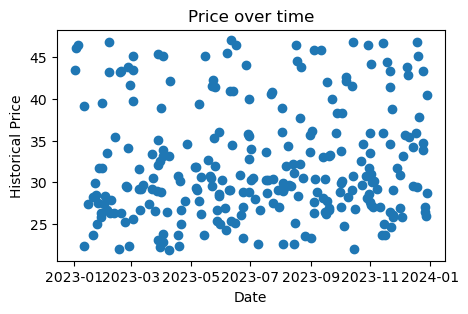

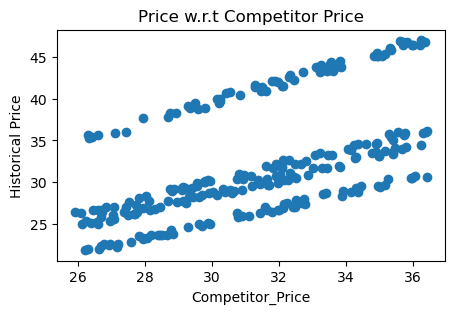

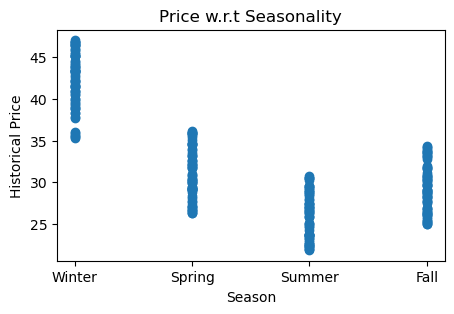

1001


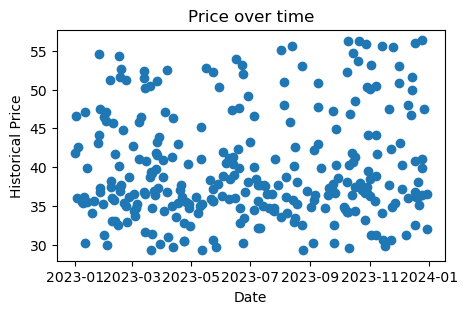

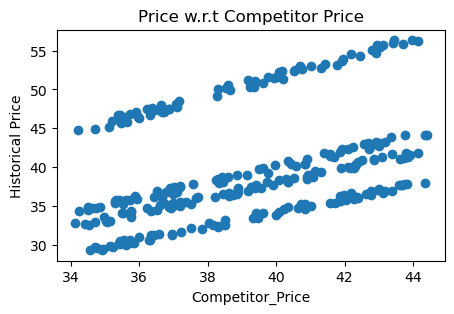

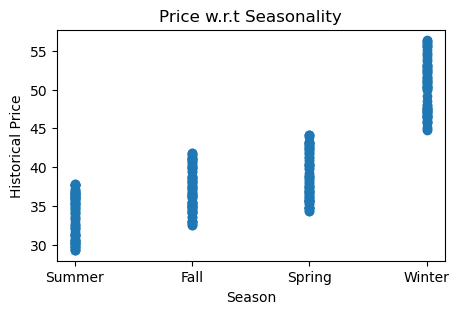

1002


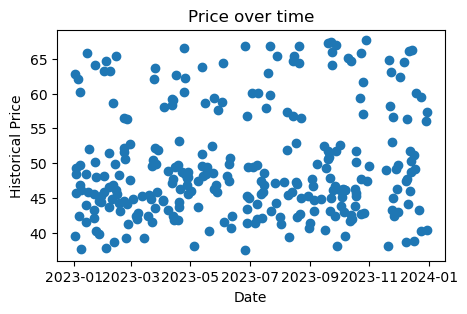

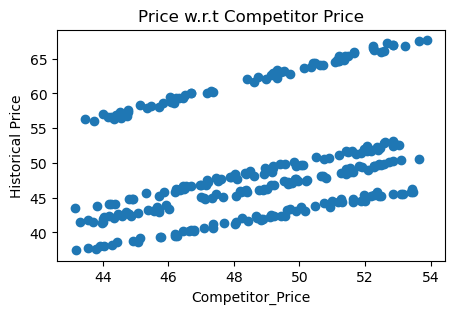

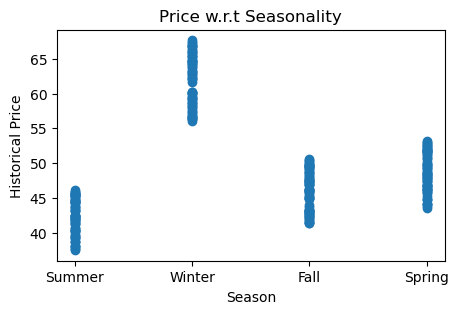

1003


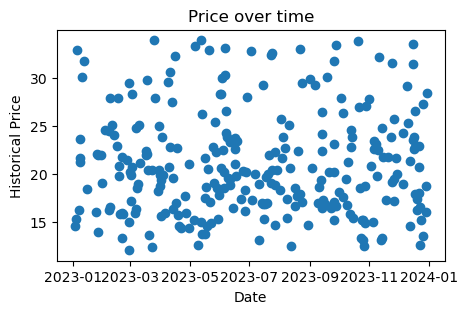

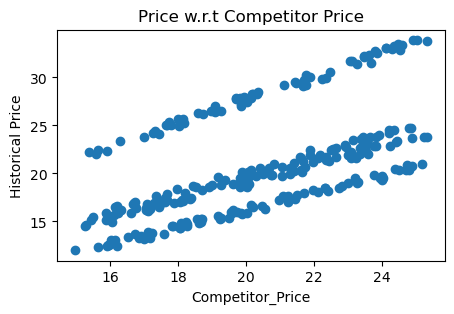

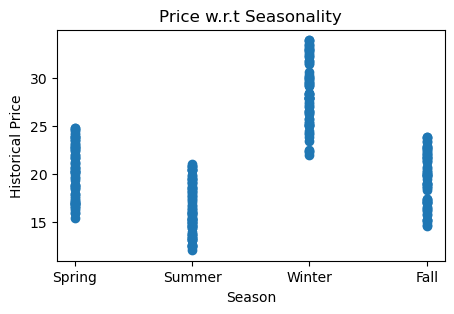

1004


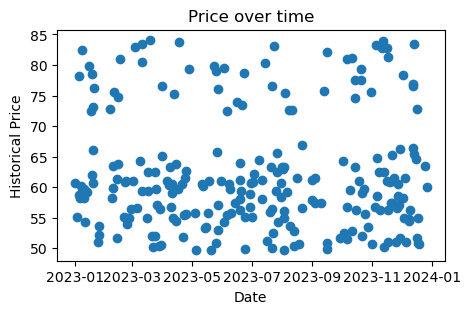

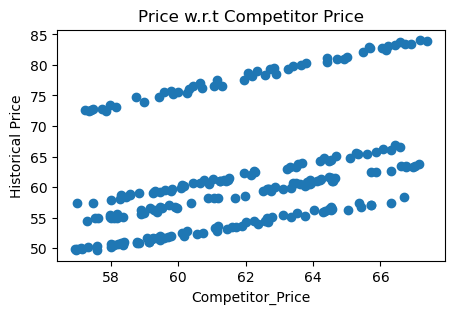

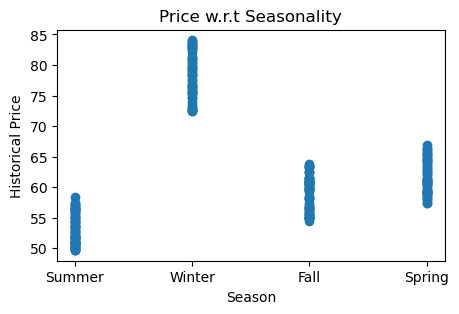

1005


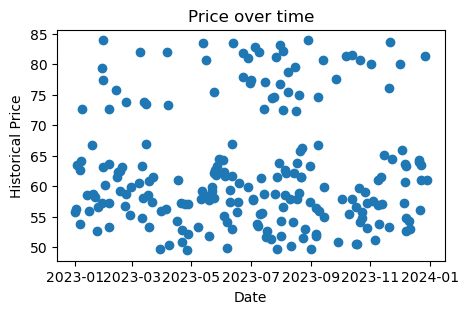

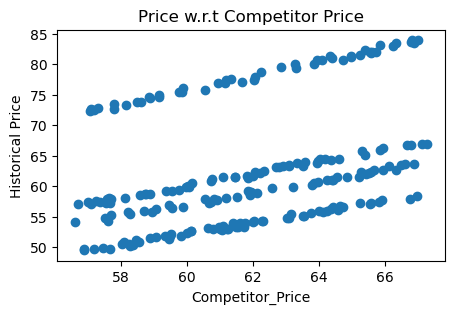

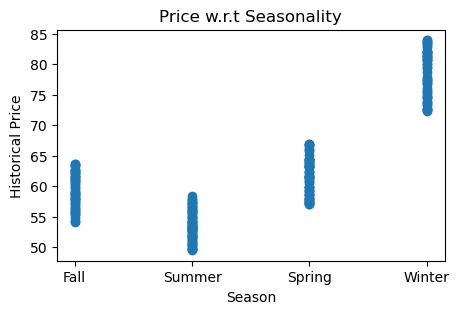

1006


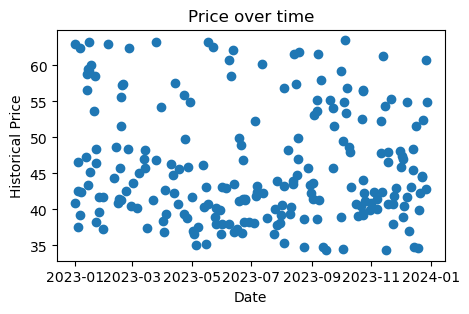

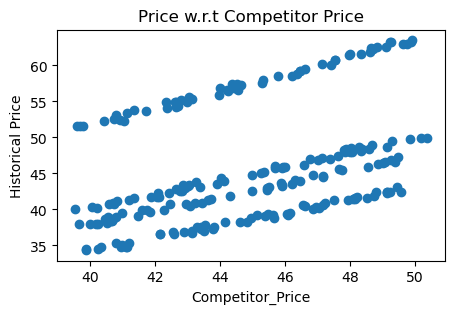

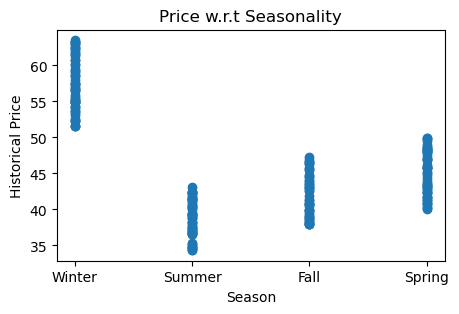

1007


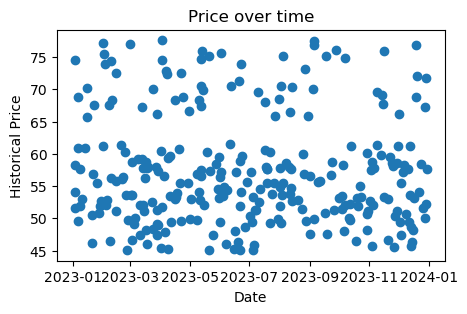

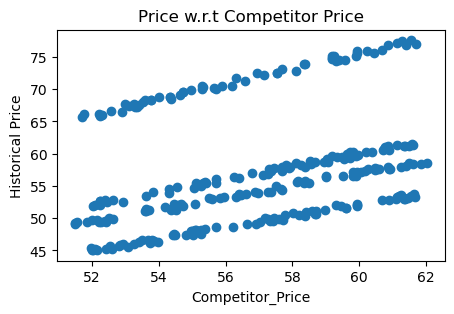

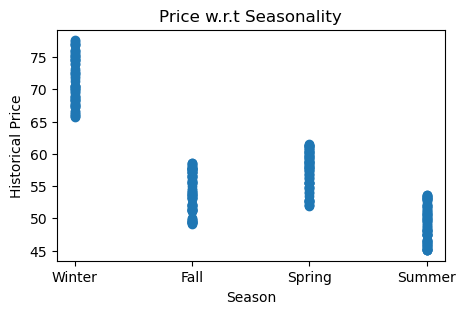

1008


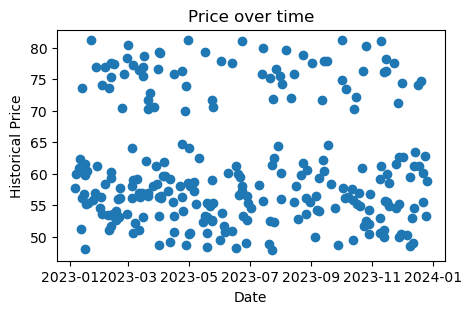

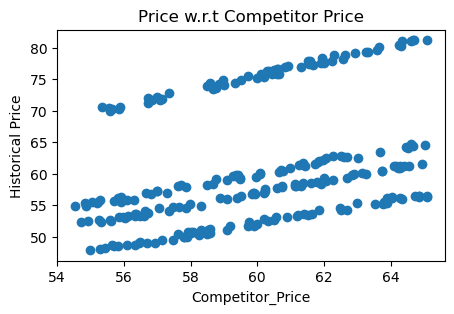

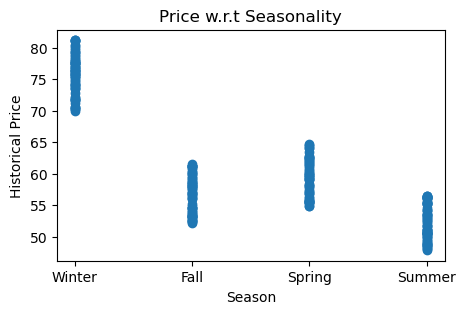

1009


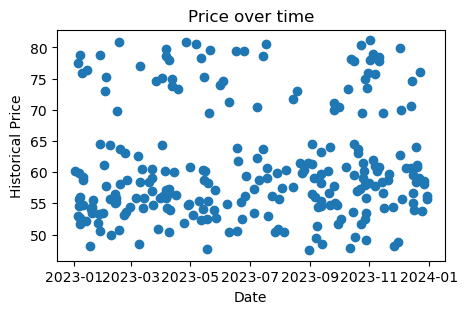

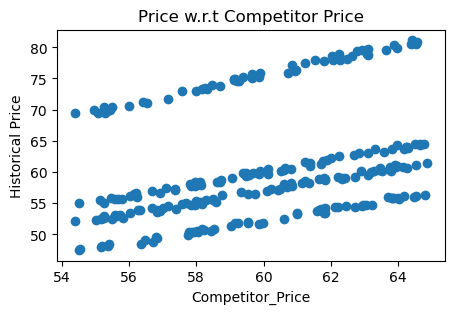

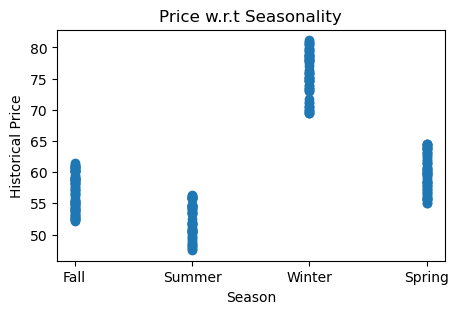

1010


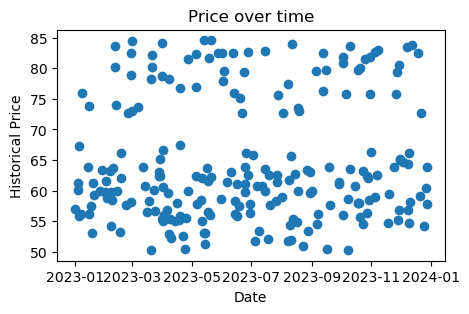

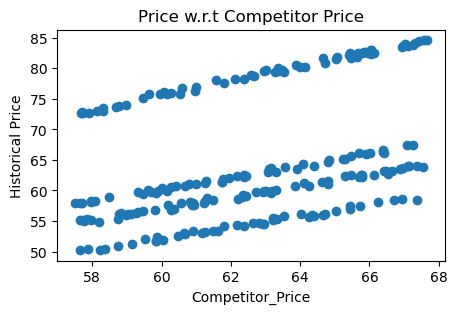

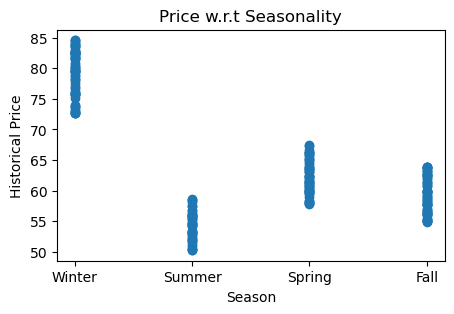

1011


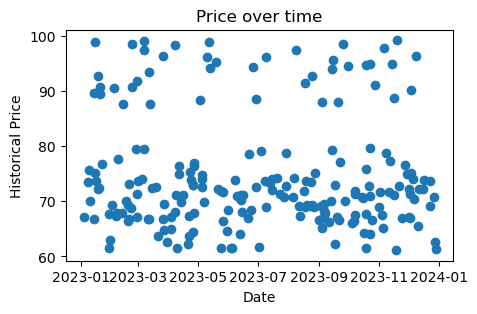

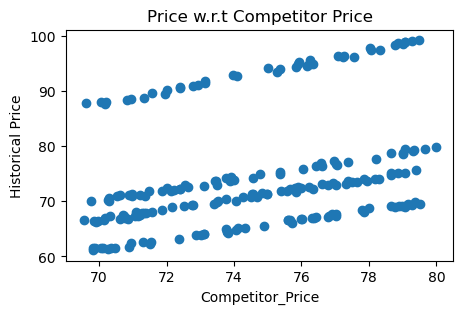

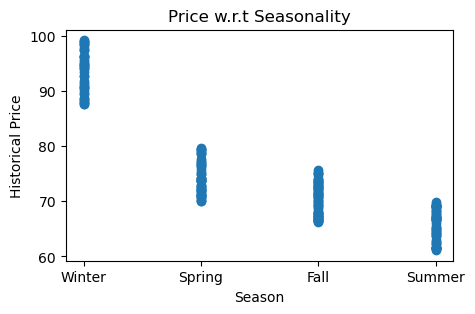

1012


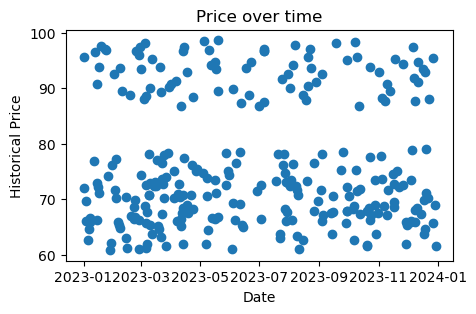

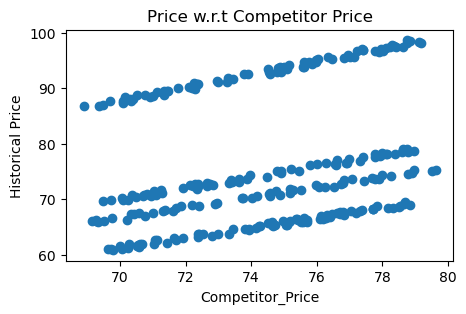

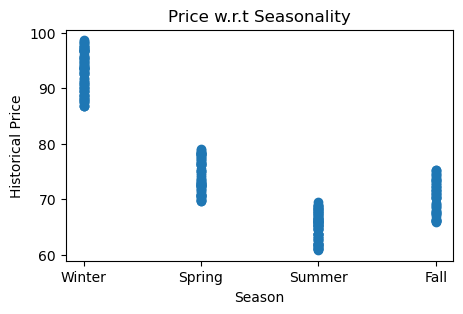

1013


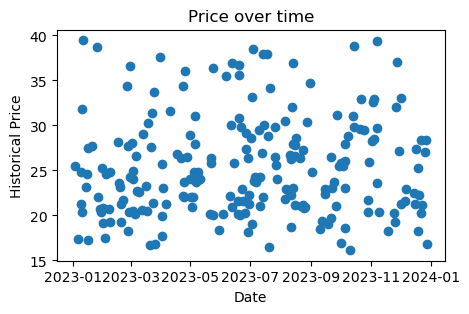

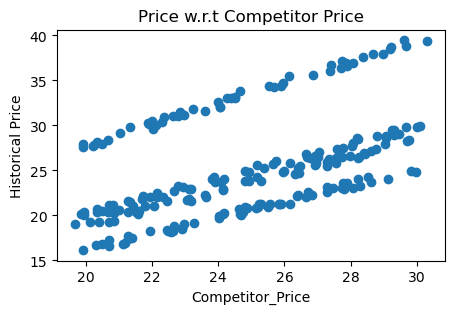

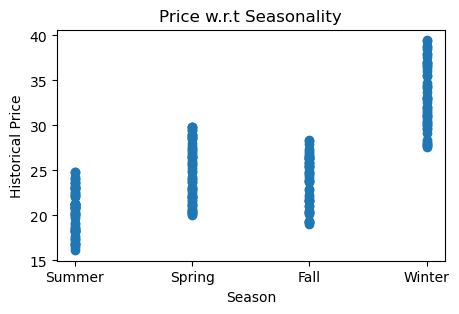

1014


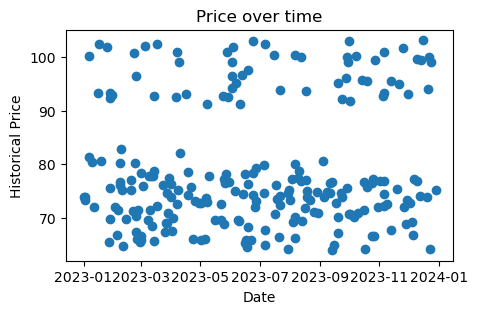

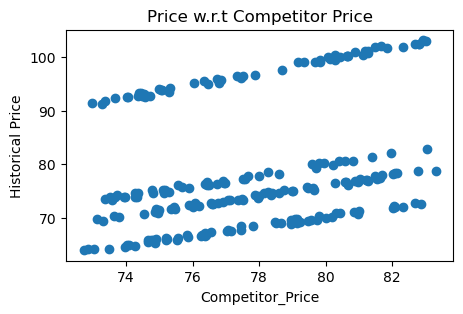

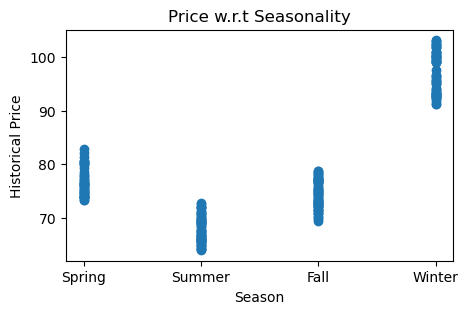

1015


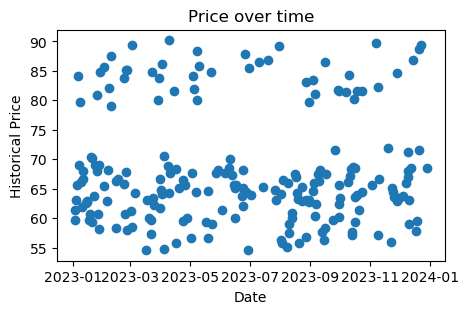

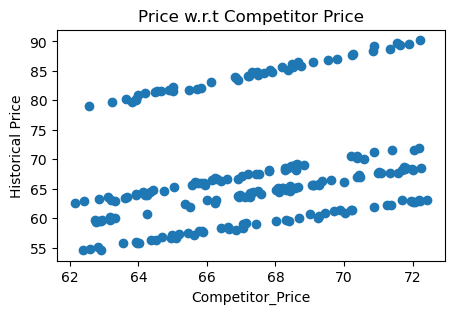

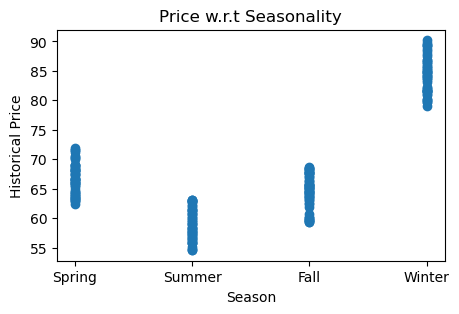

1016


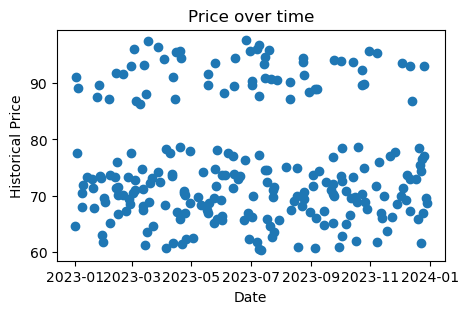

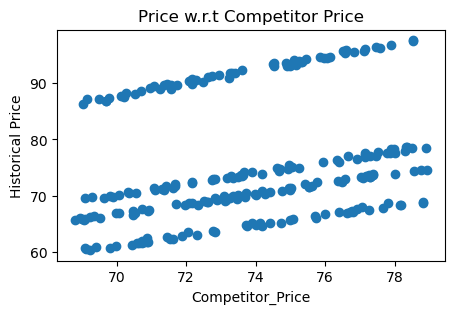

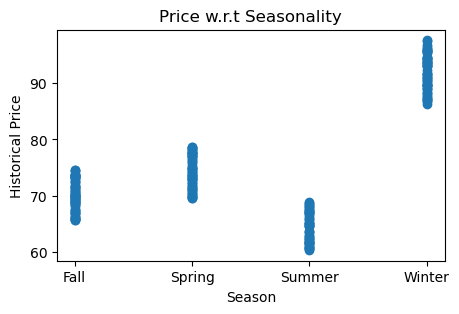

1017


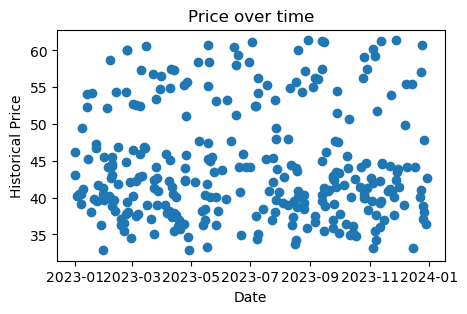

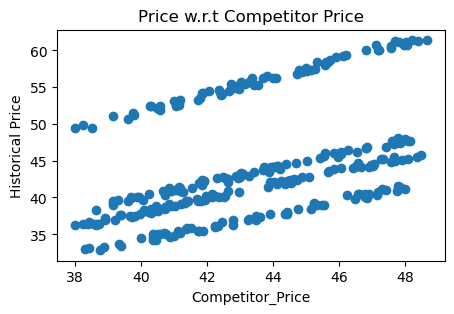

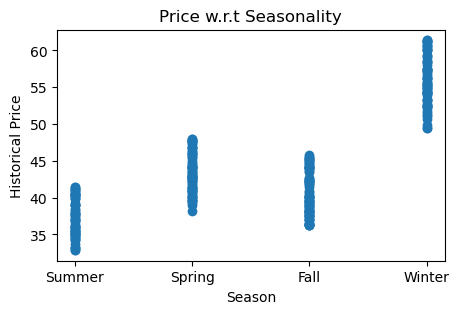

1018


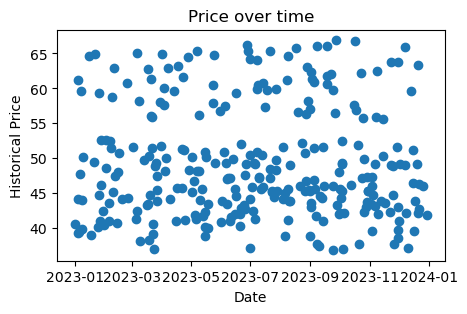

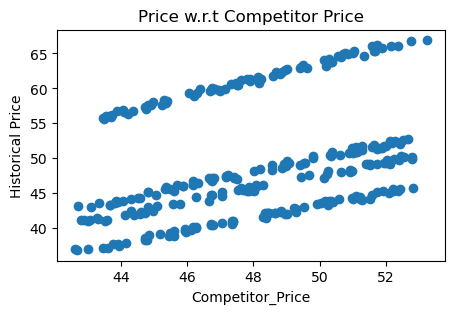

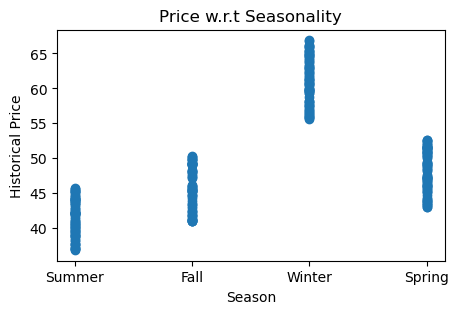

1019


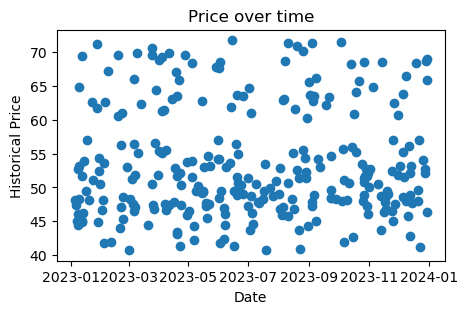

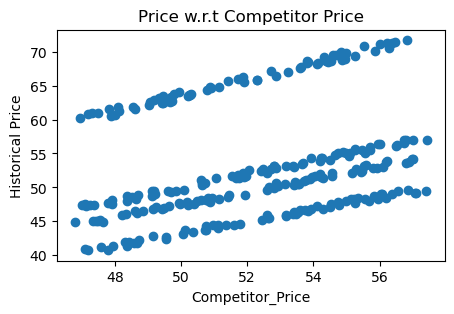

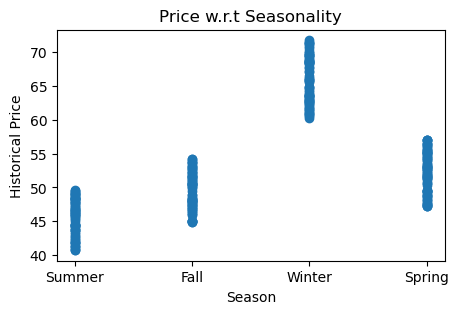

1020


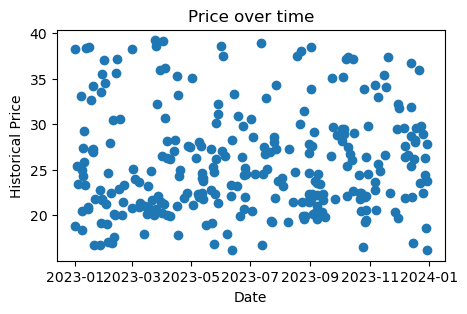

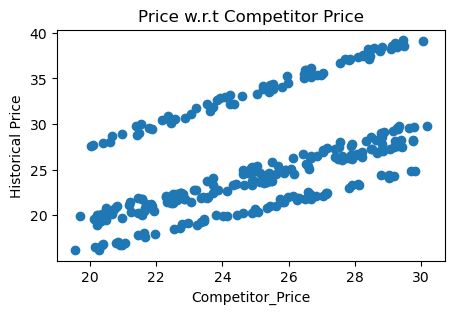

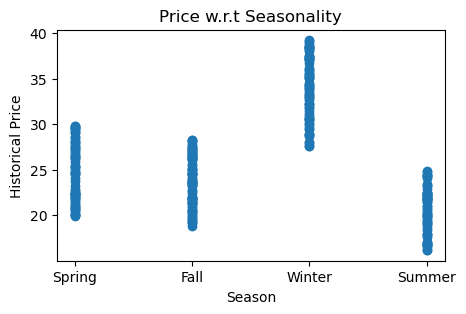

1021


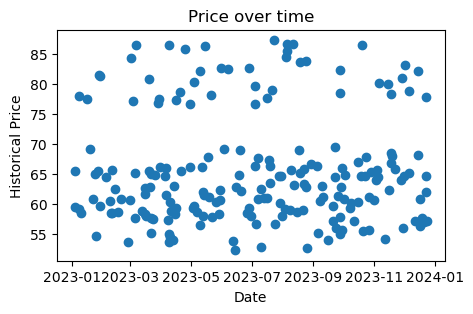

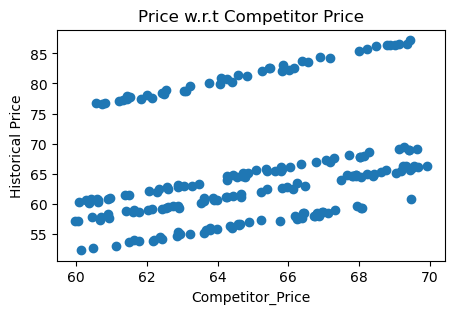

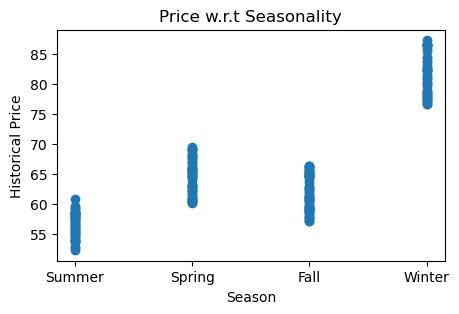

1022


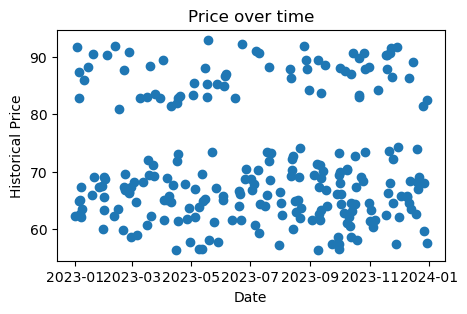

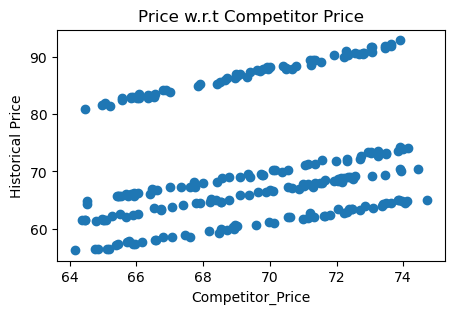

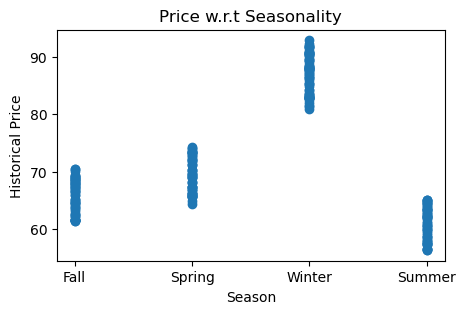

1023


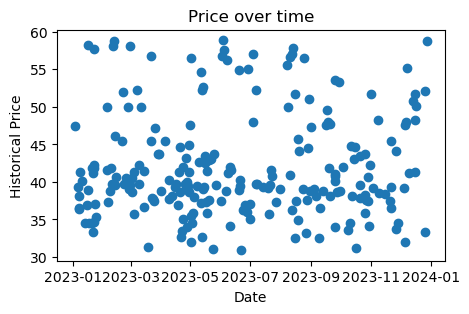

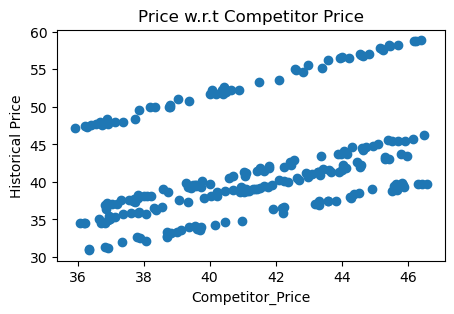

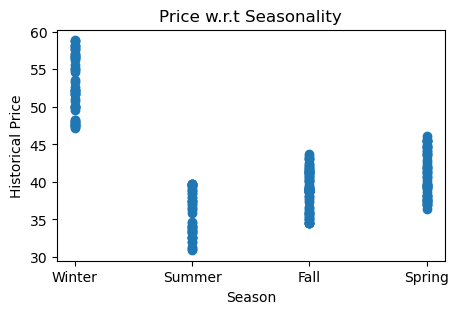

1024


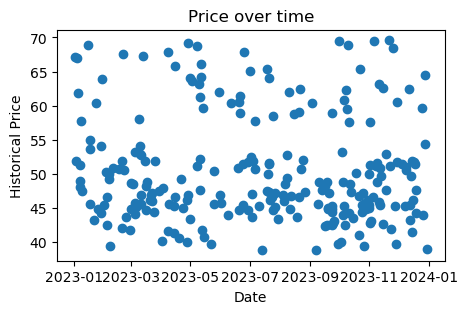

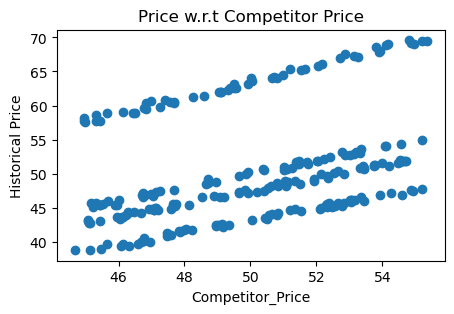

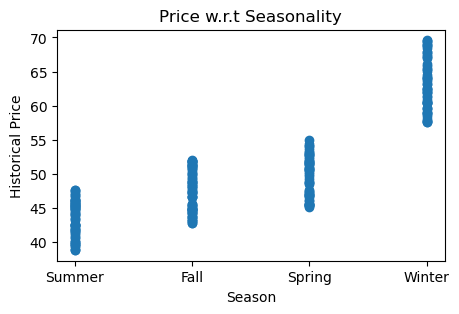

1025


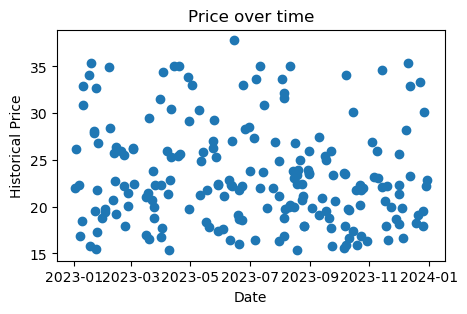

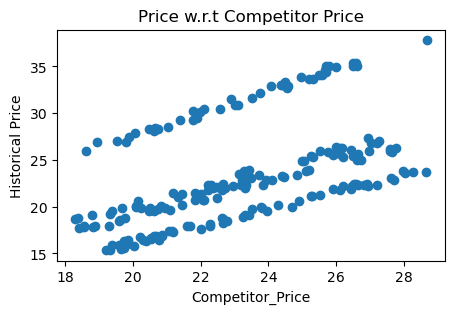

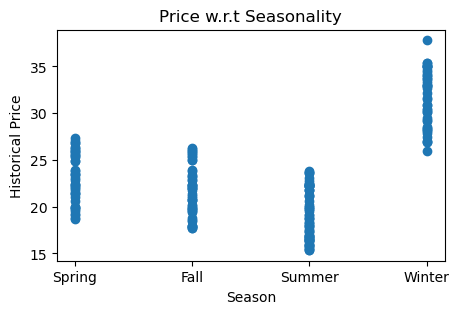

1026


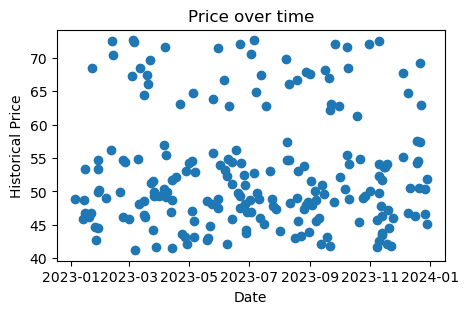

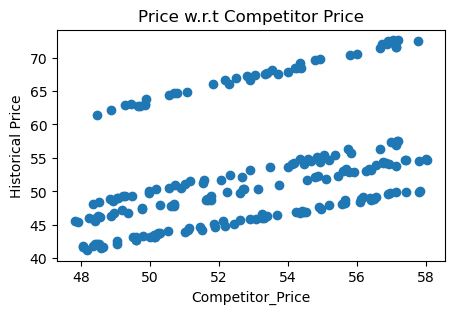

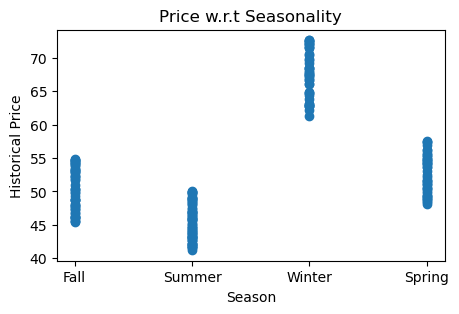

1027


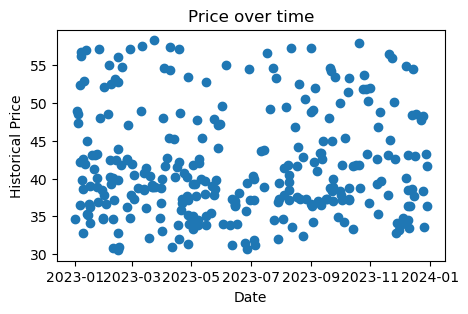

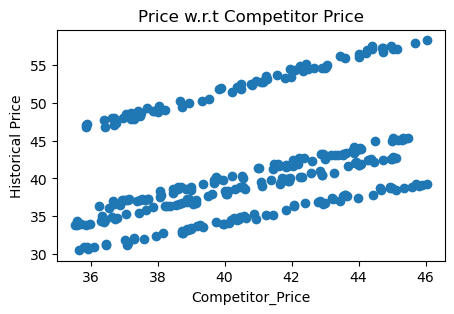

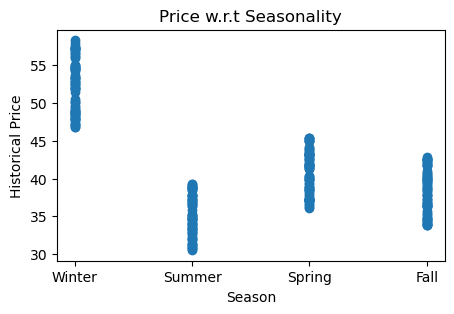

1028


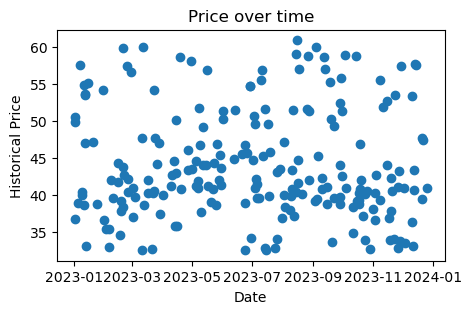

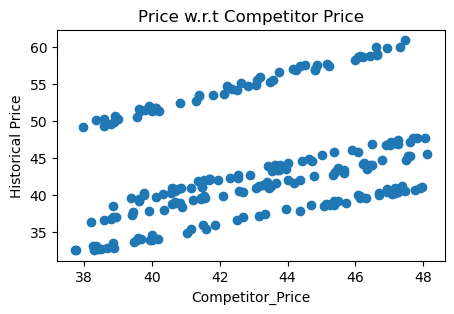

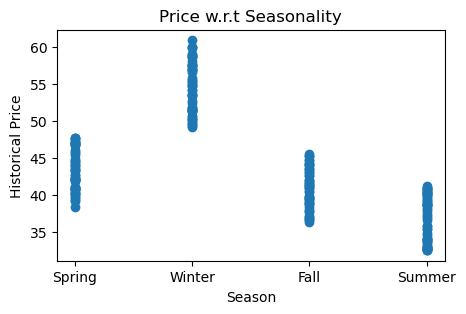

1029


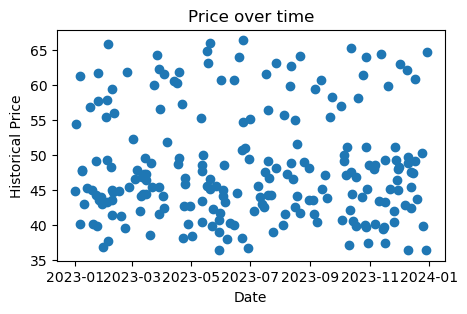

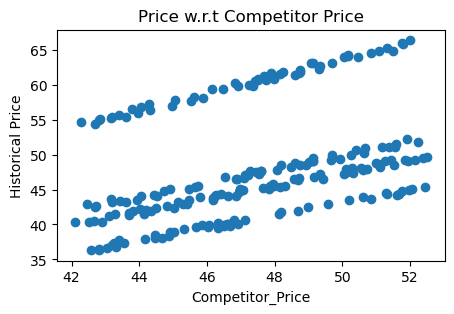

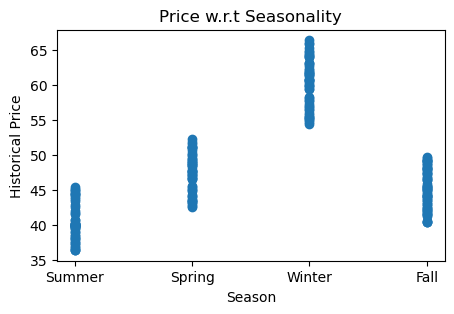

1030


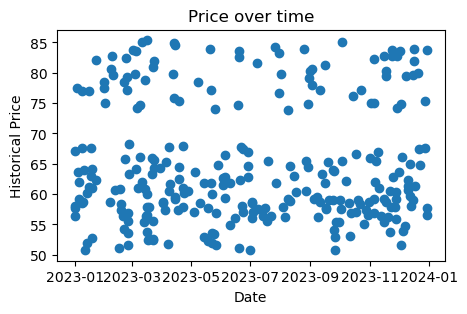

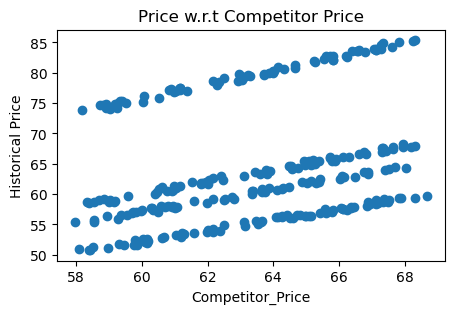

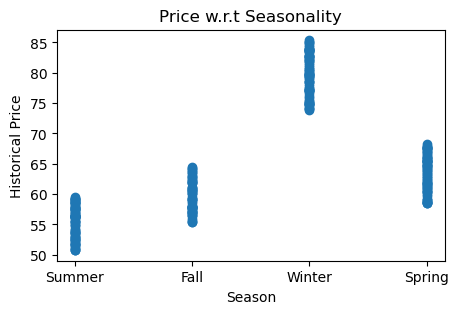

1031


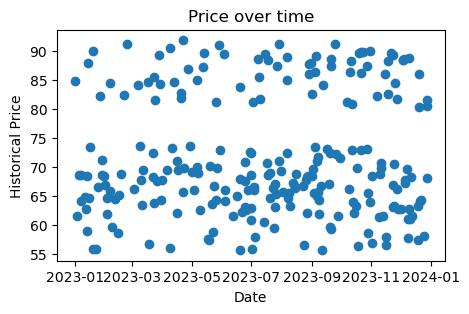

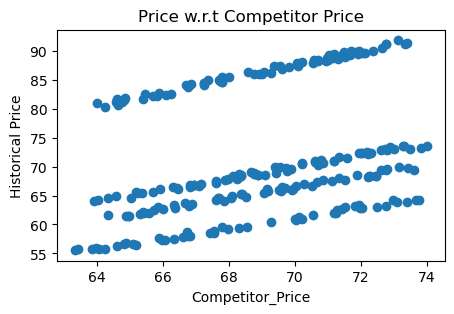

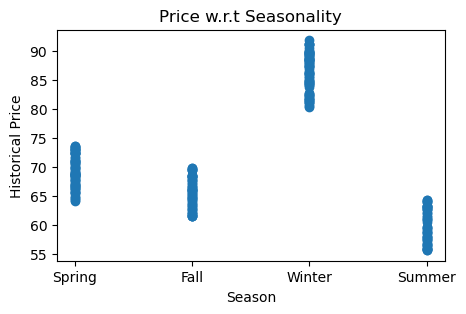

1032


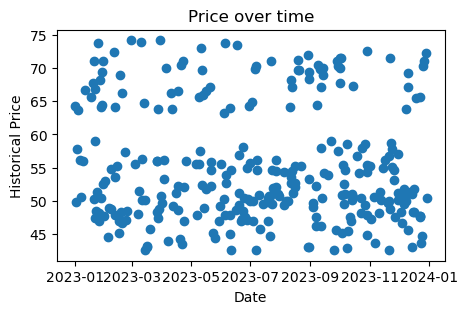

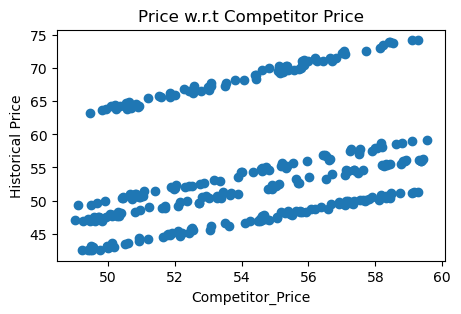

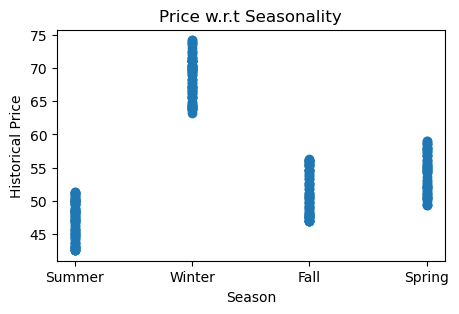

1033


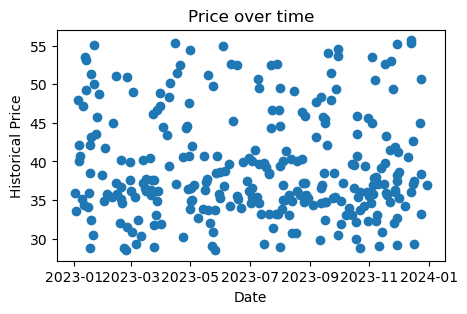

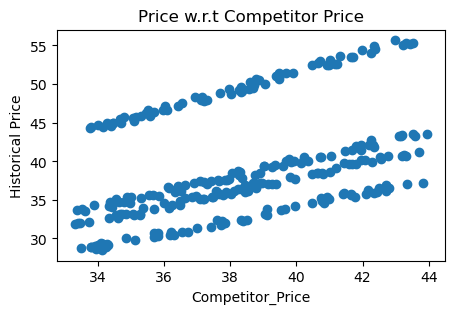

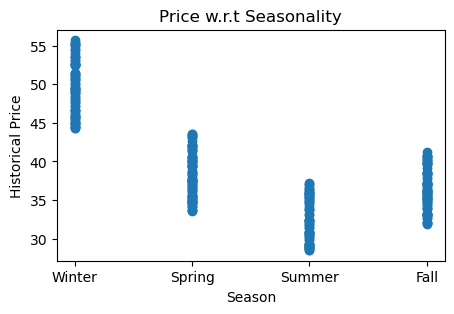

1034


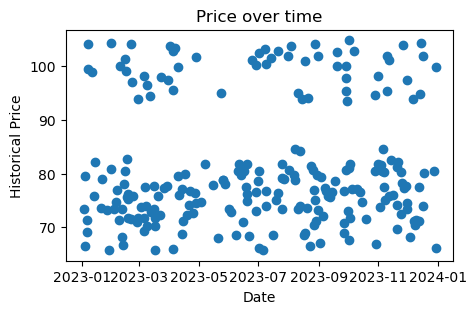

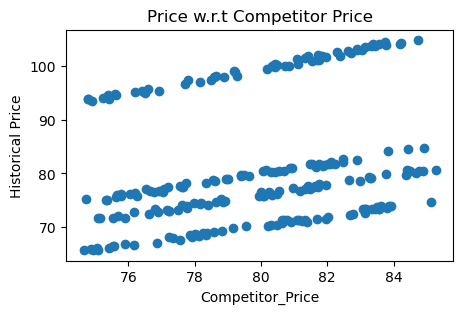

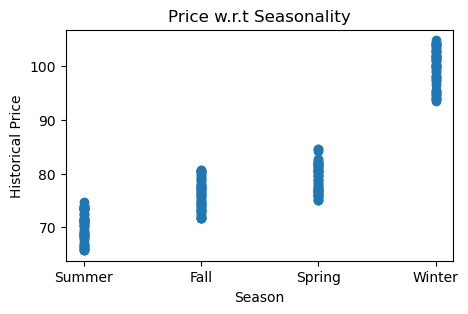

1035


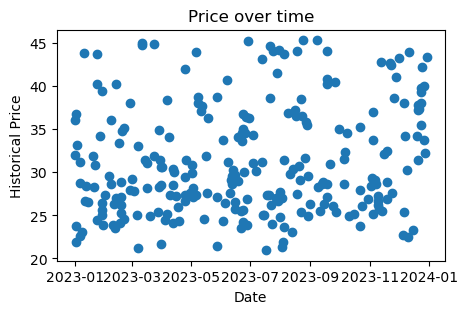

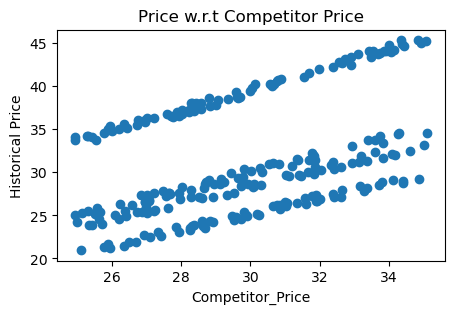

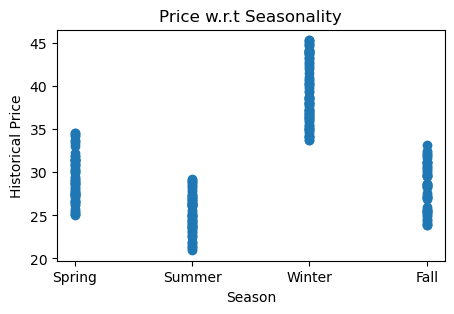

1036


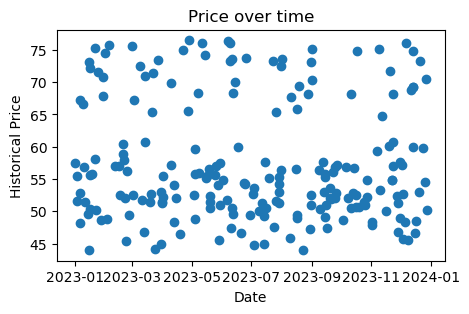

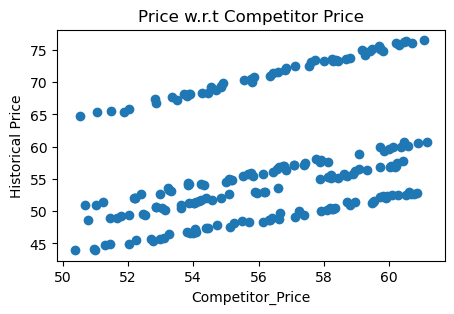

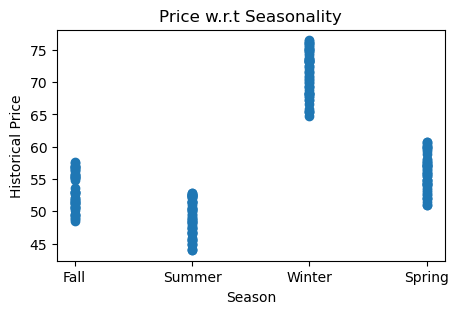

1037


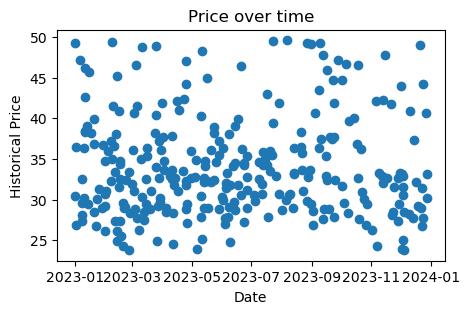

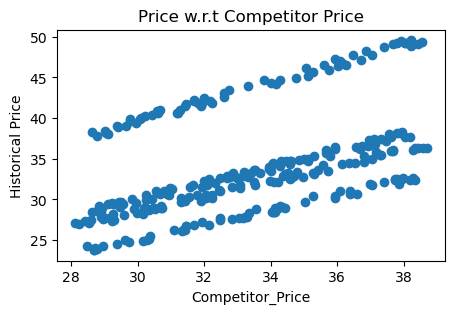

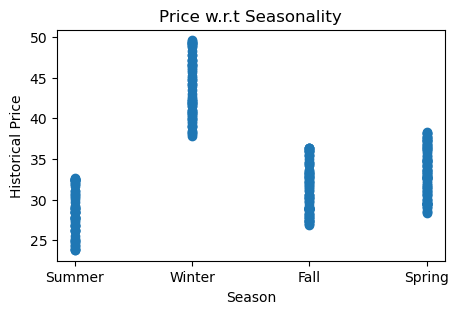

1038


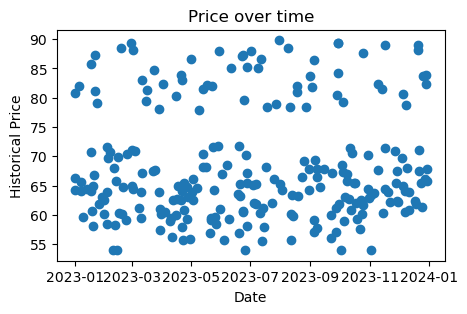

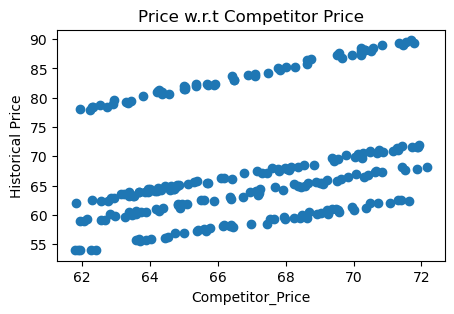

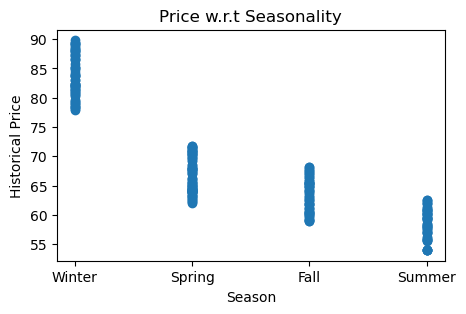

1039


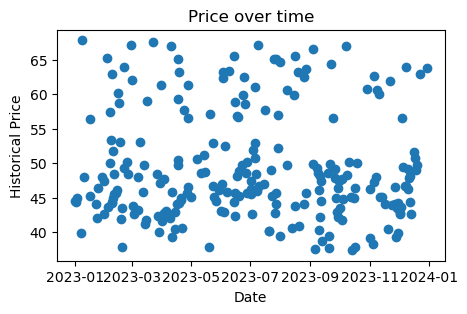

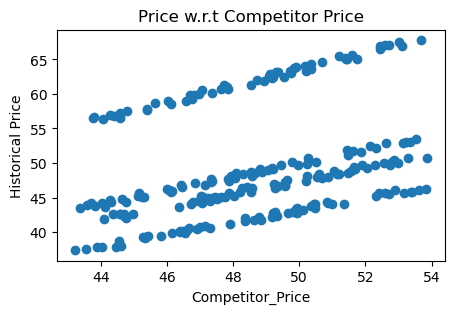

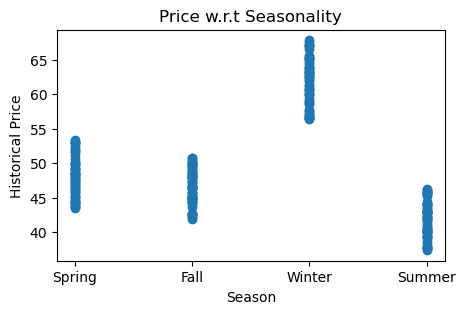

1040


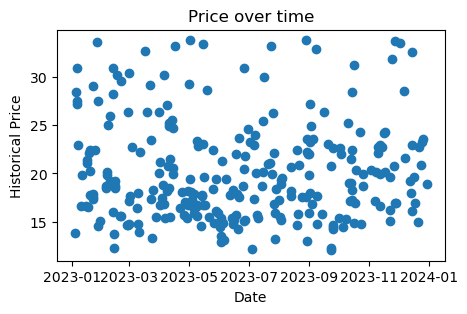

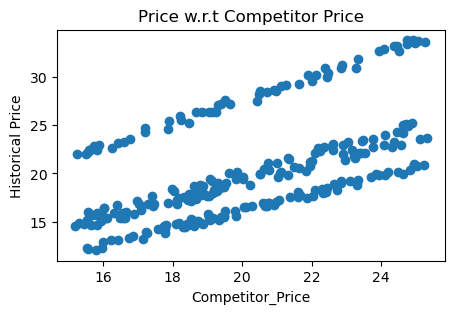

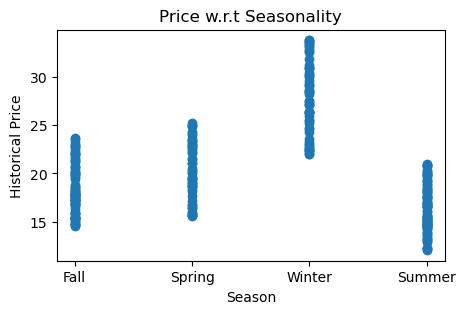

1041


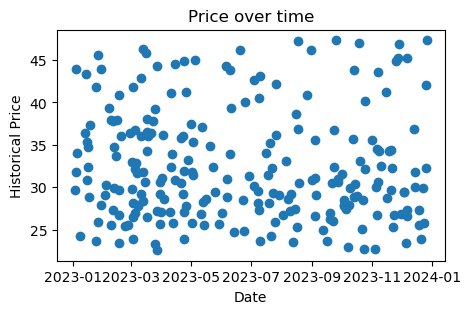

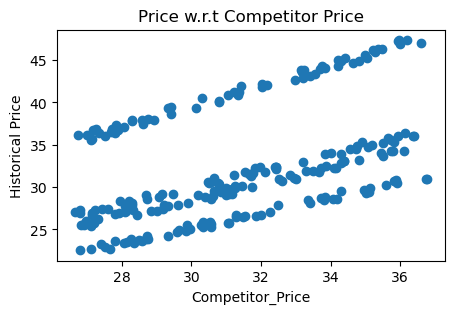

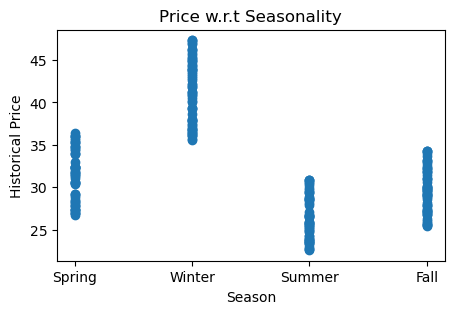

1042


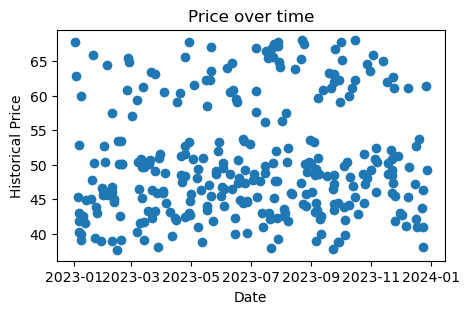

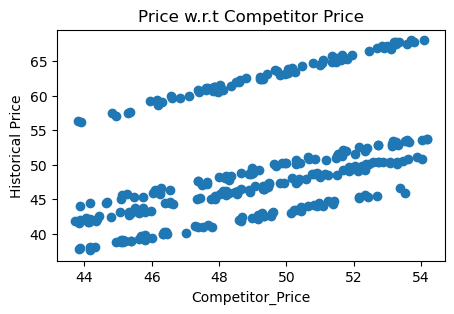

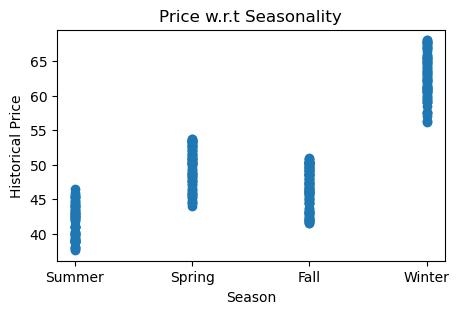

1043


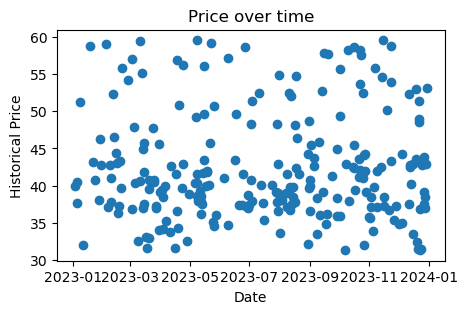

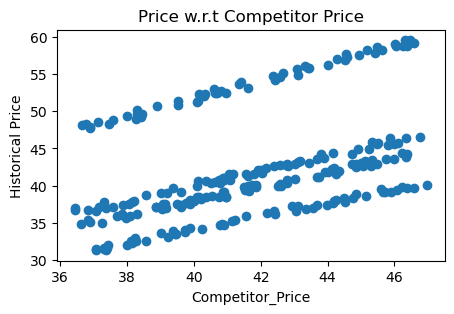

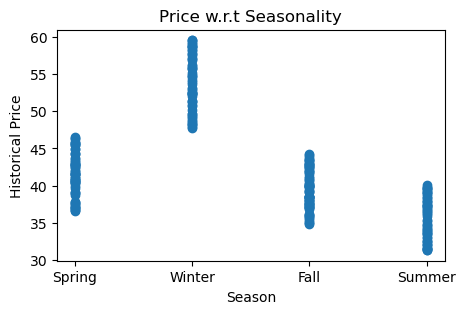

1044


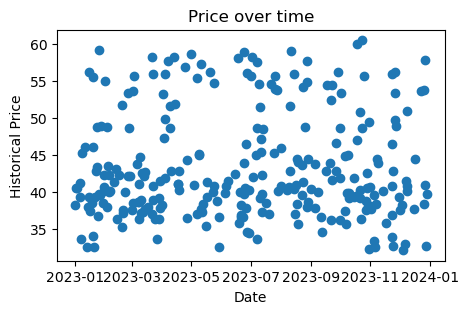

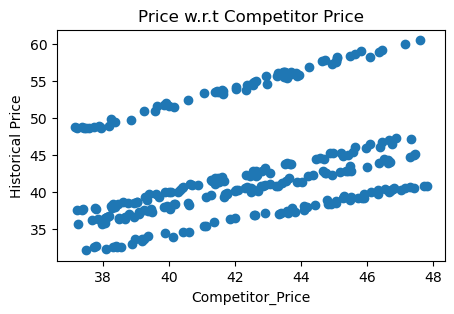

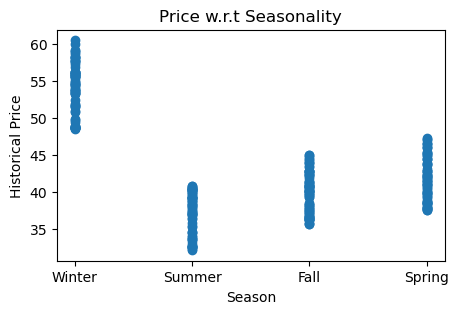

1045


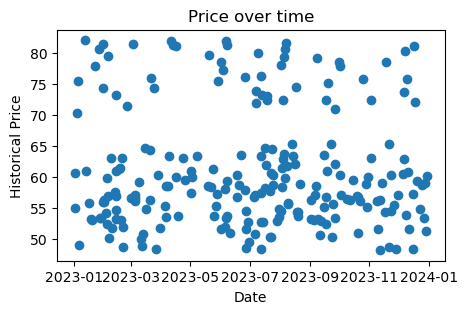

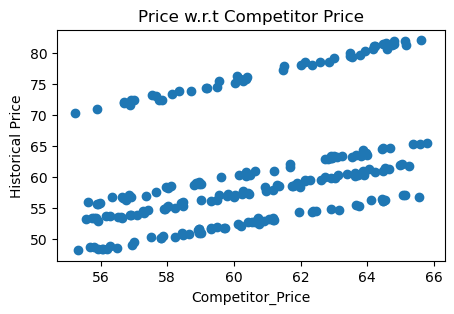

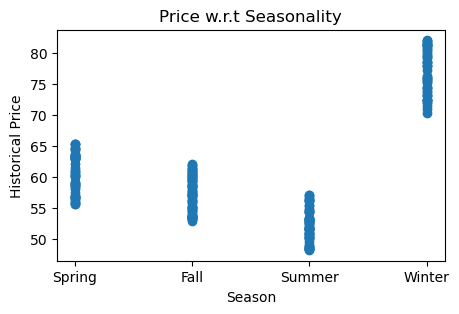

1046


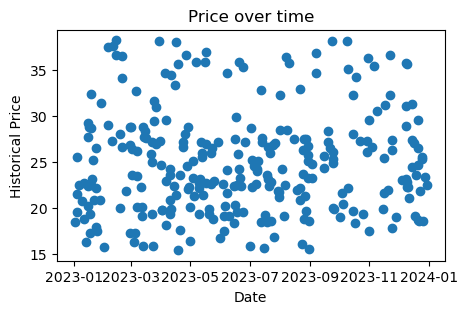

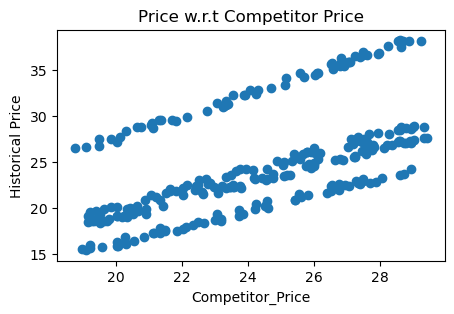

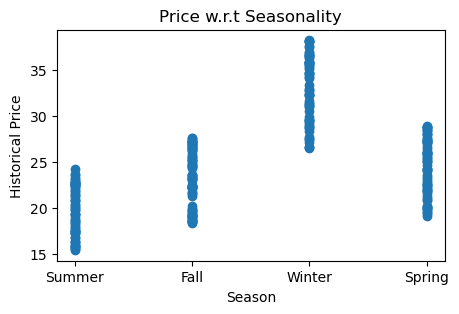

1047


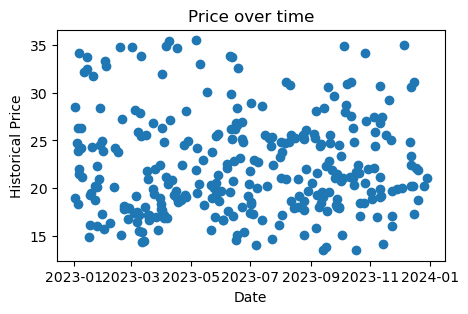

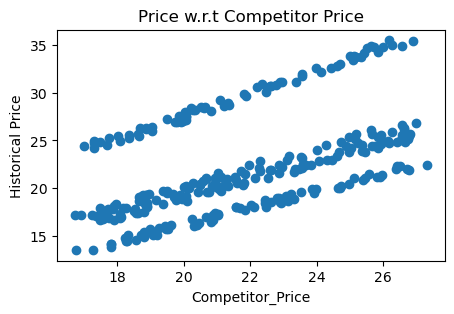

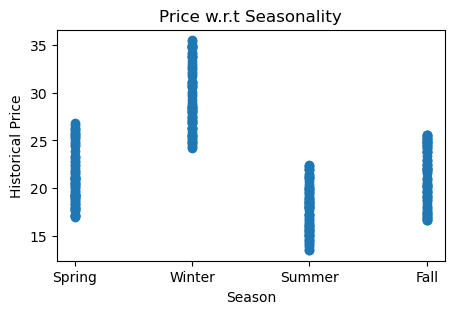

1048


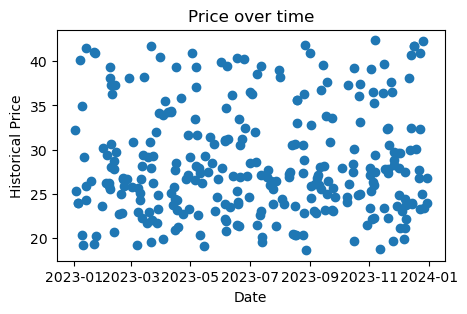

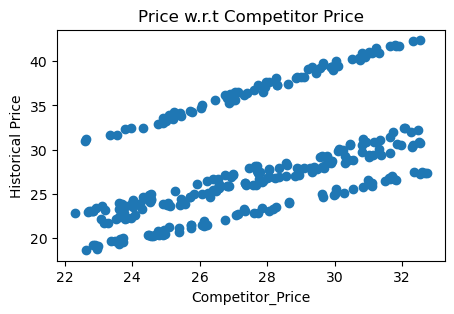

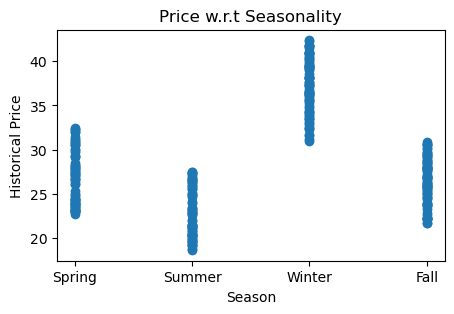

1049


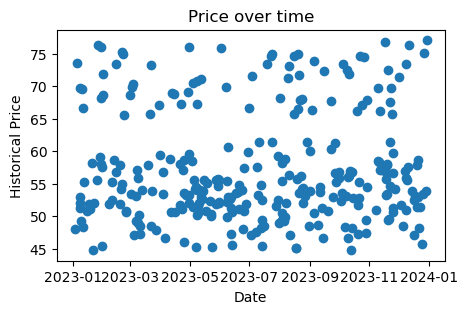

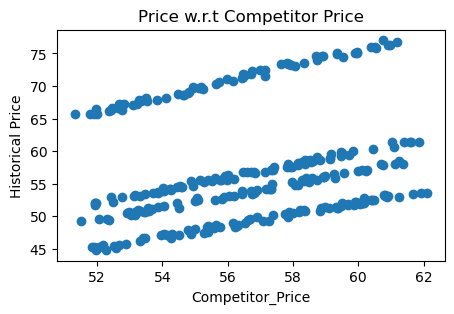

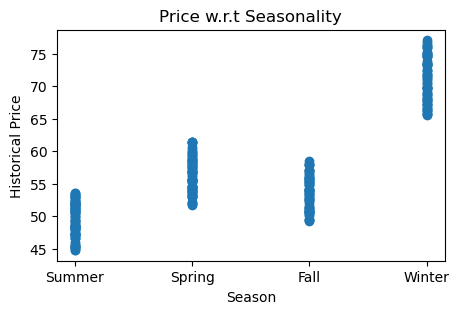

1050


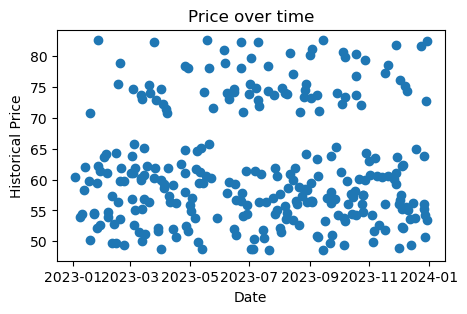

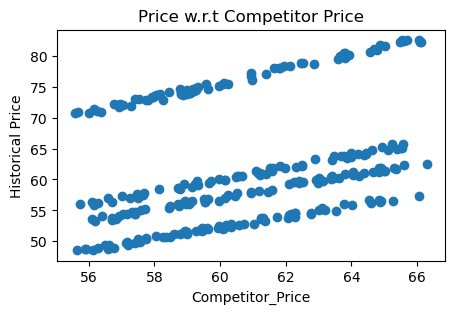

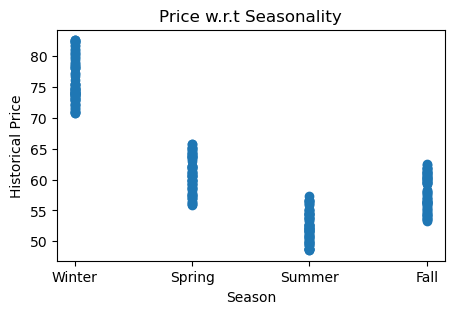

1051


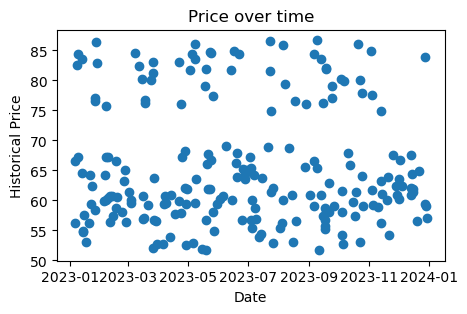

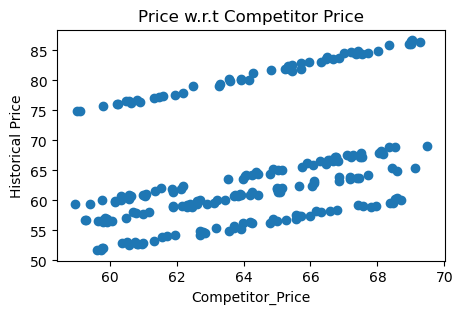

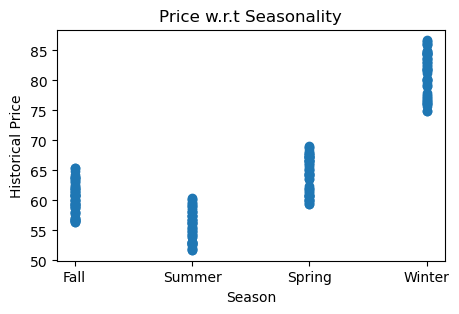

1052


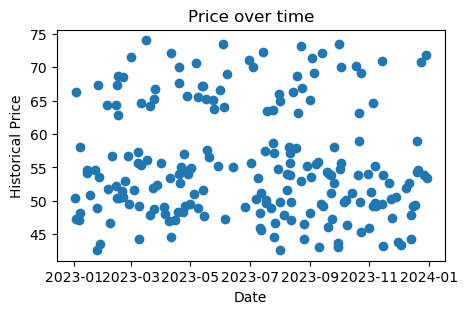

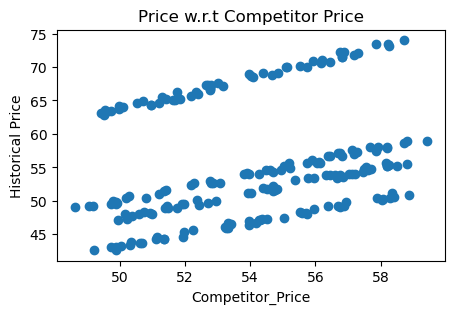

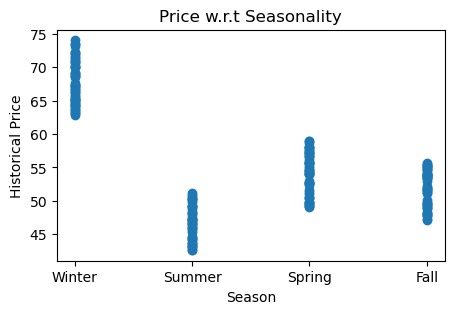

1053


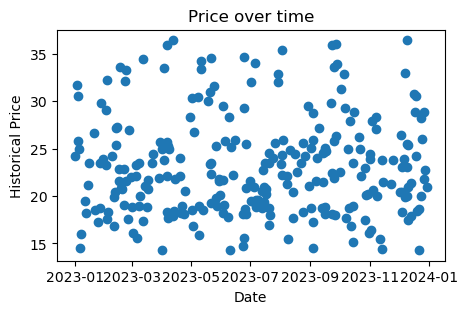

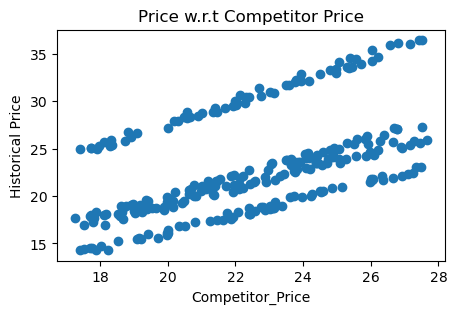

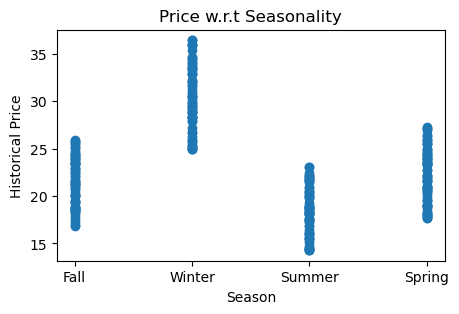

1054


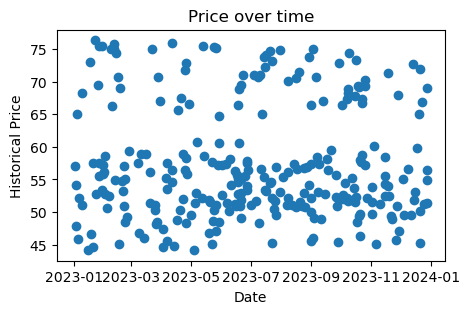

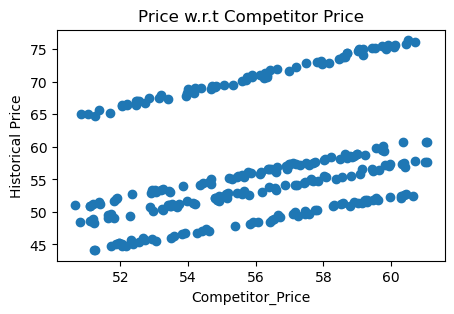

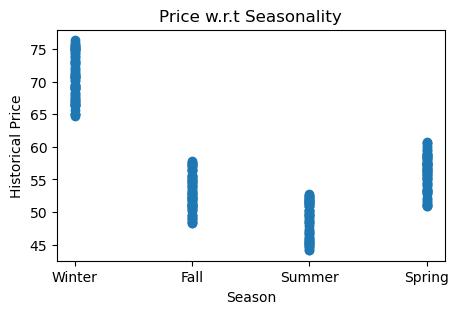

1055


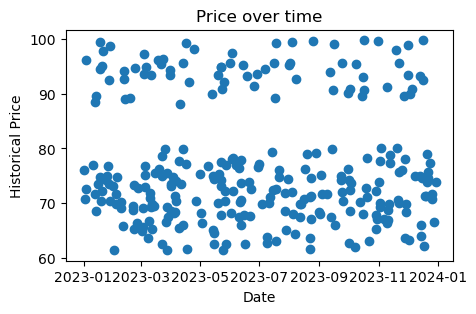

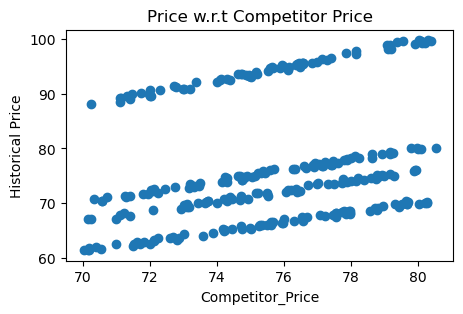

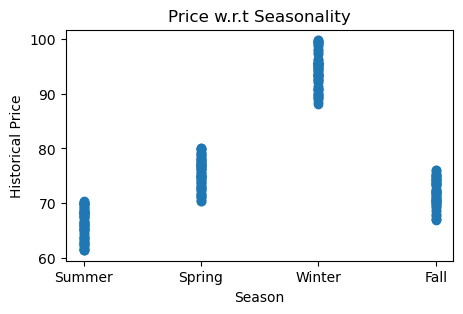

1056


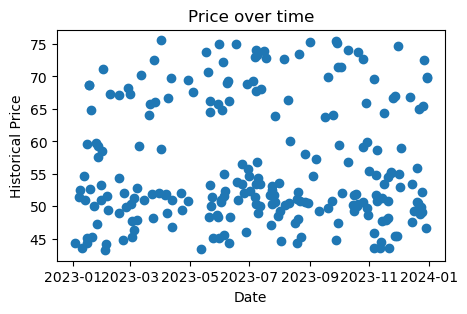

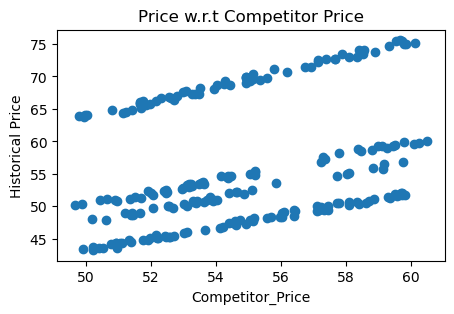

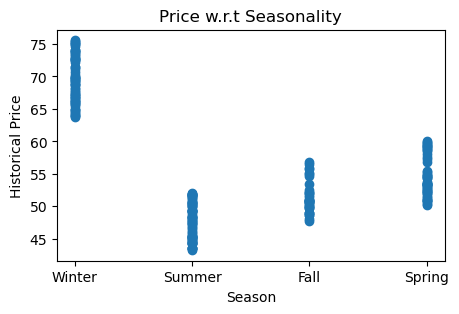

1057


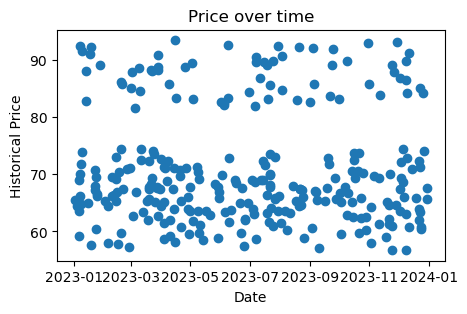

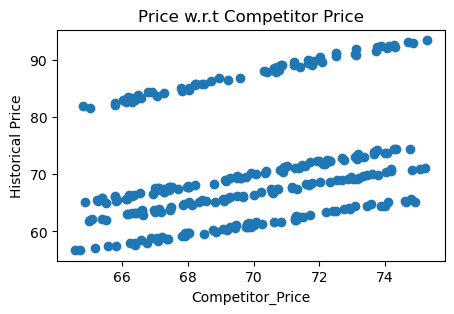

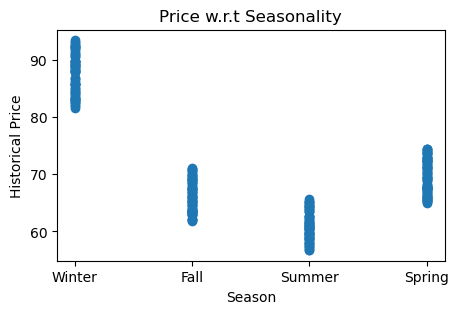

1058


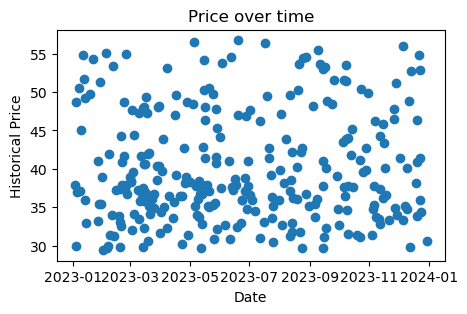

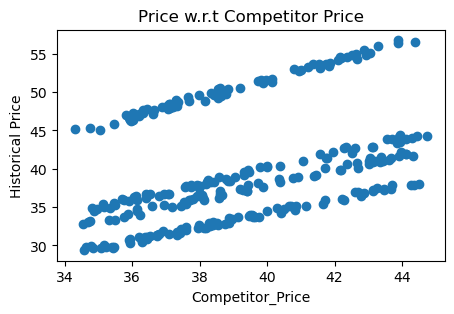

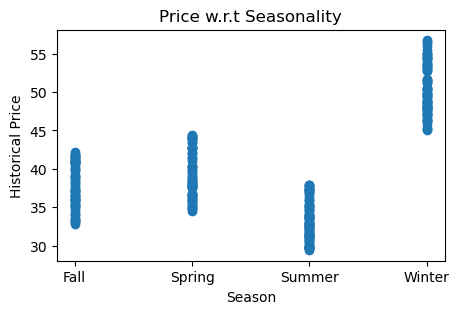

1059


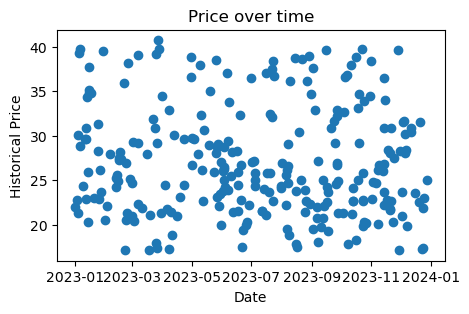

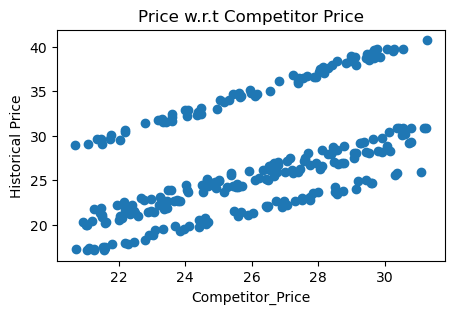

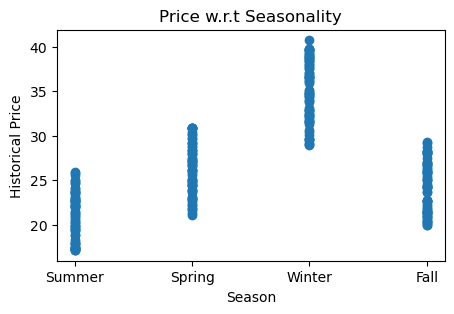

1060


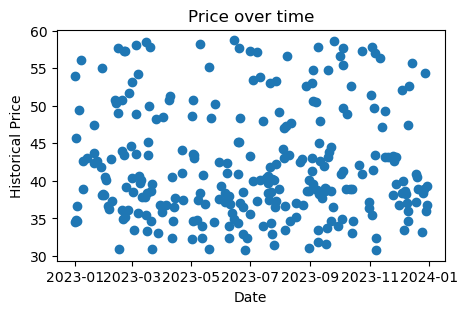

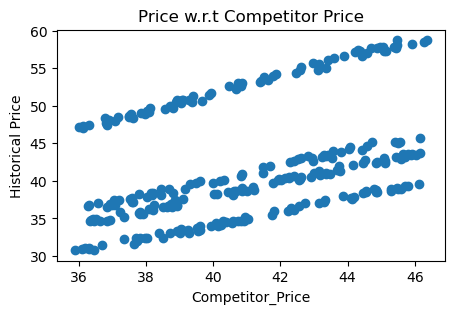

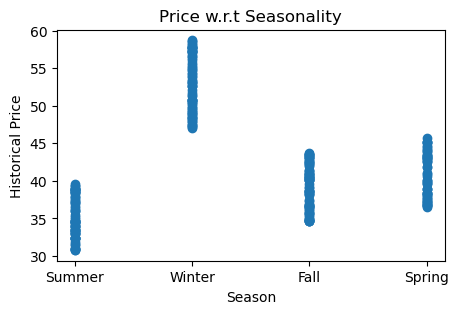

1061


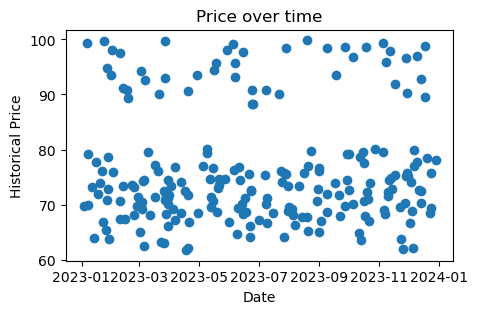

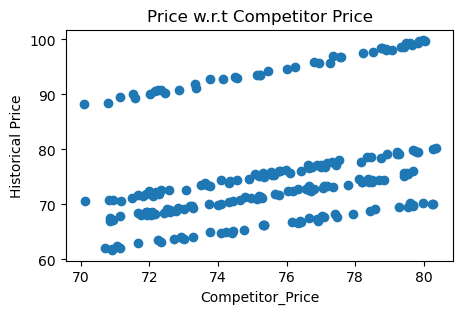

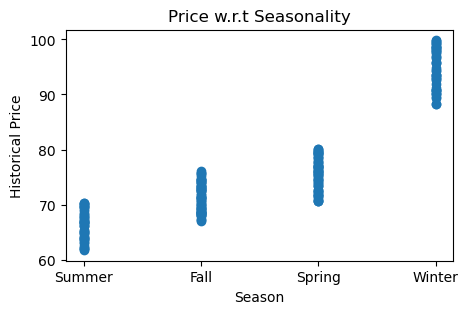

1062


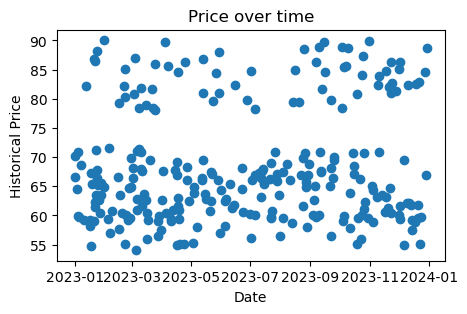

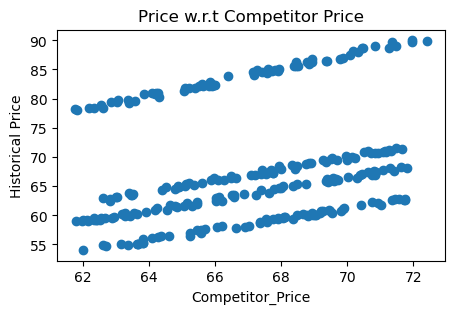

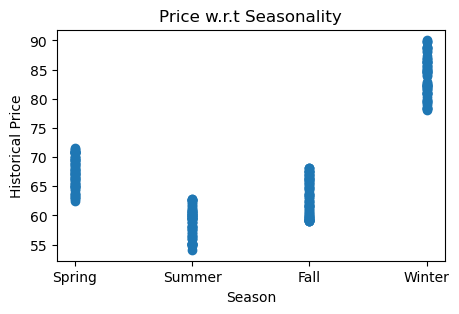

1063


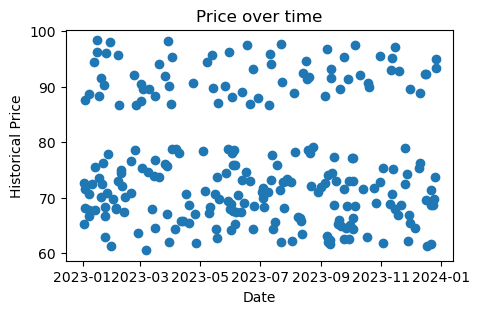

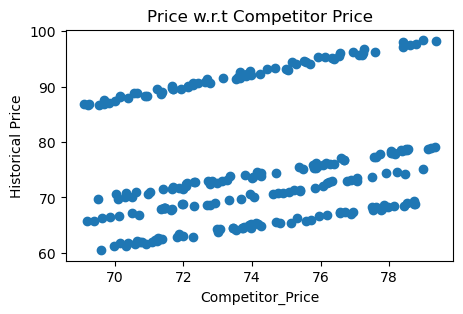

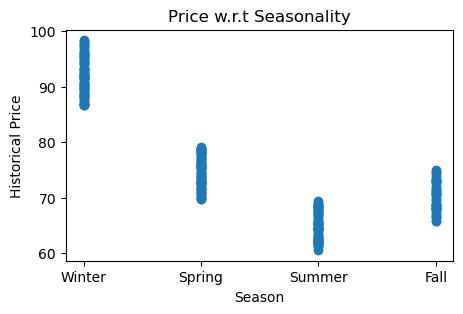

1064


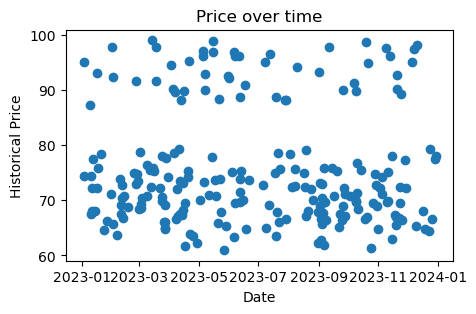

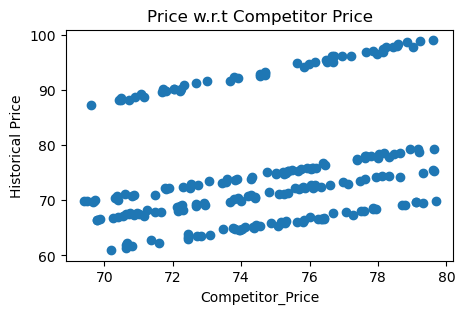

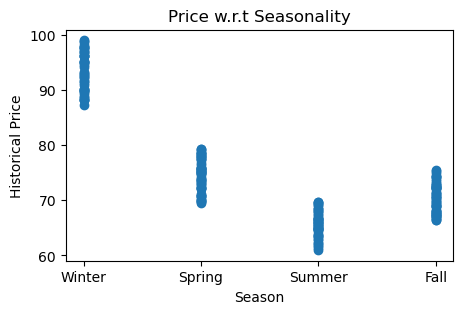

1065


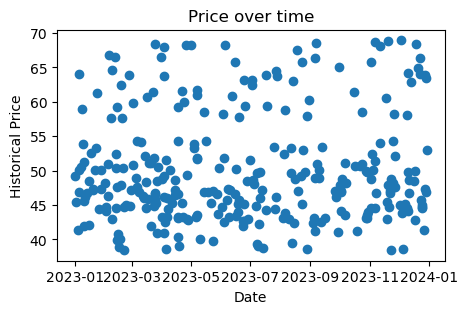

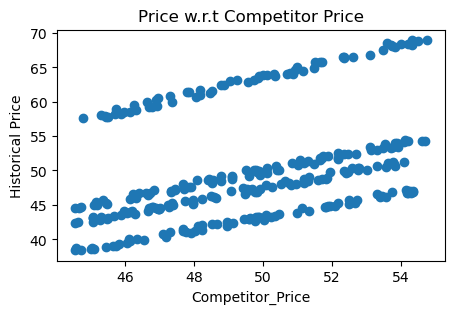

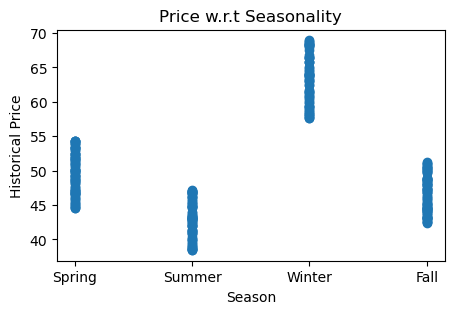

1066


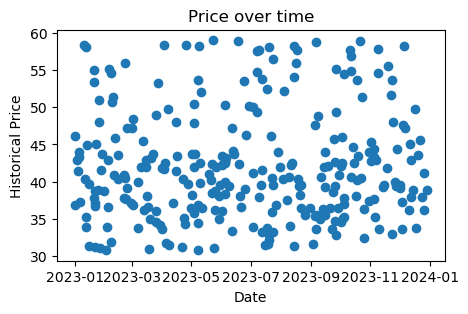

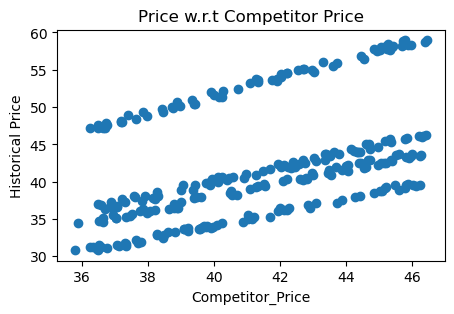

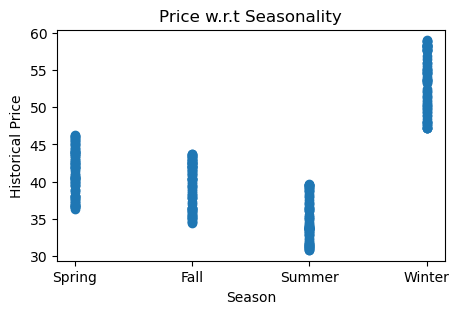

1067


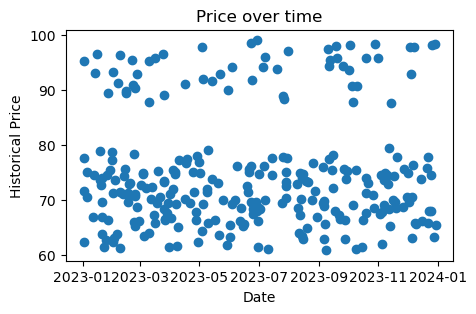

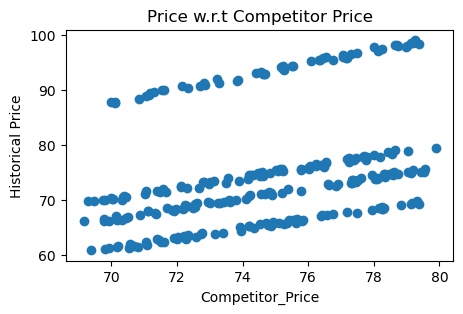

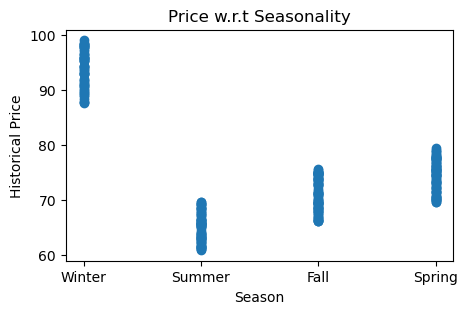

1068


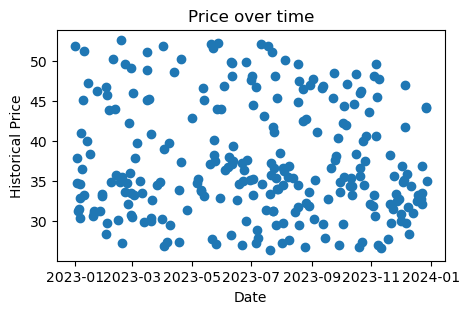

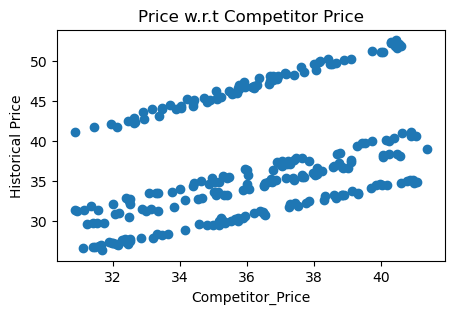

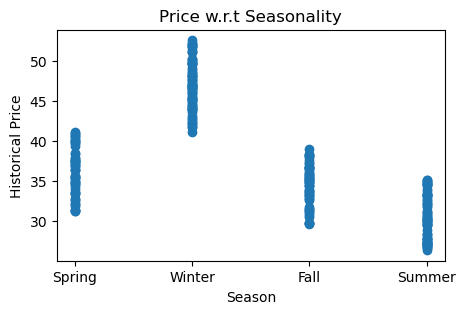

1069


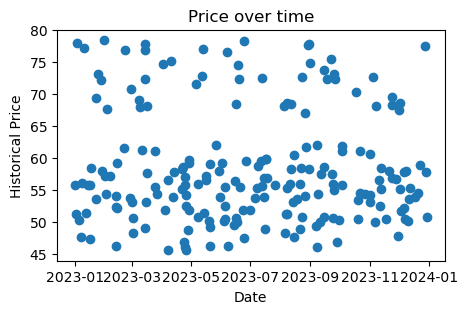

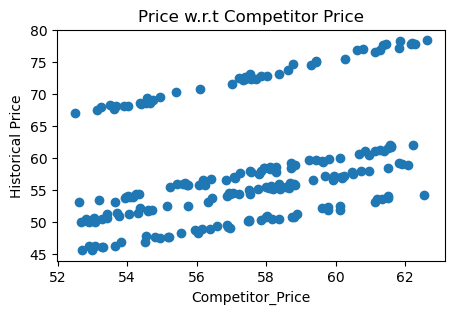

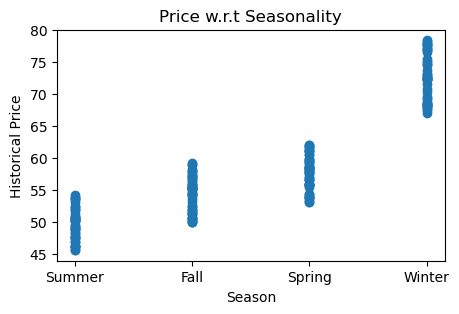

1070


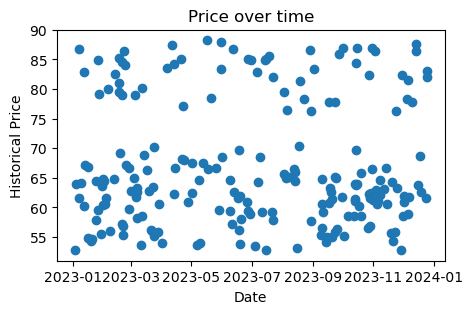

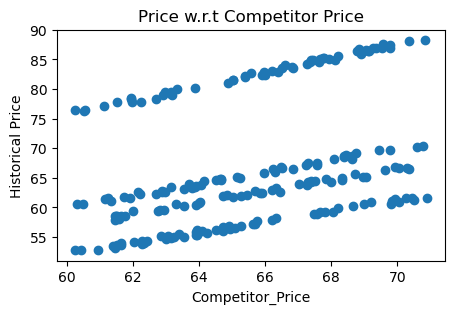

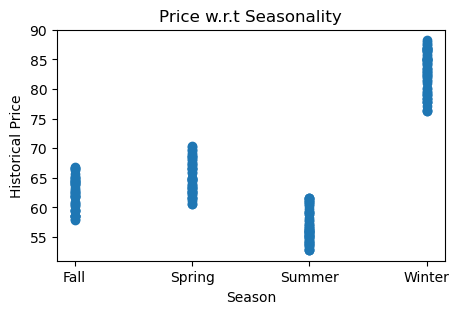

1071


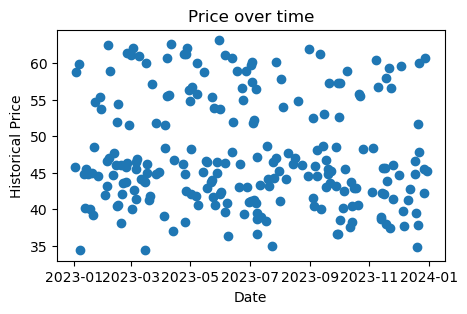

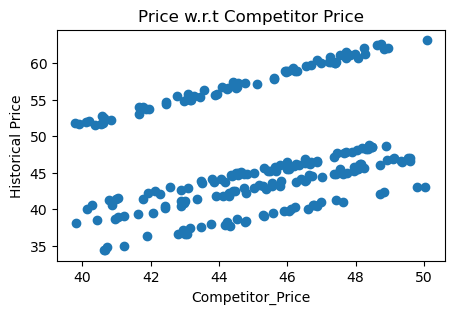

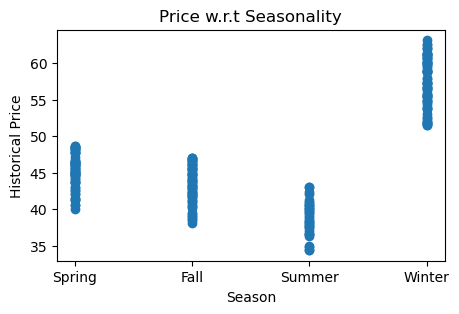

1072


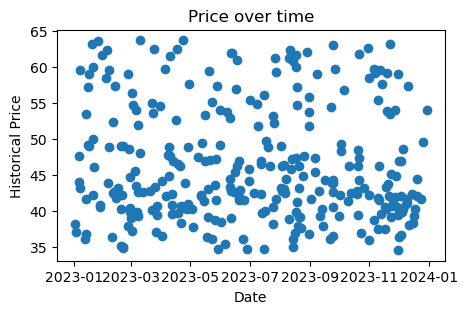

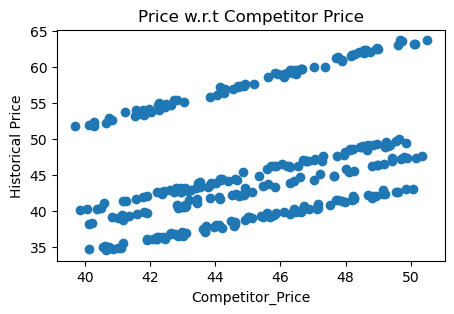

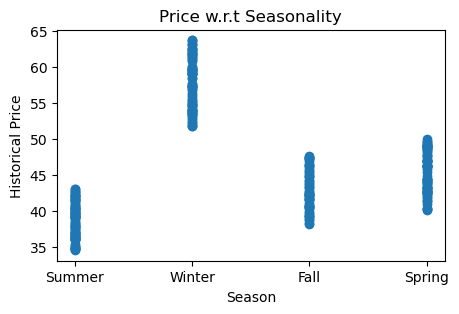

1073


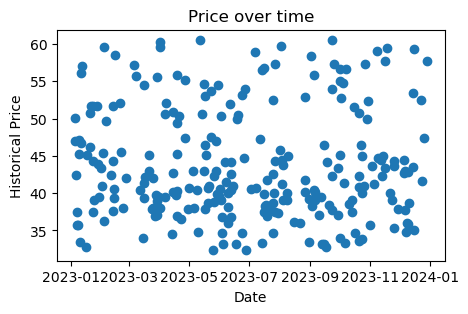

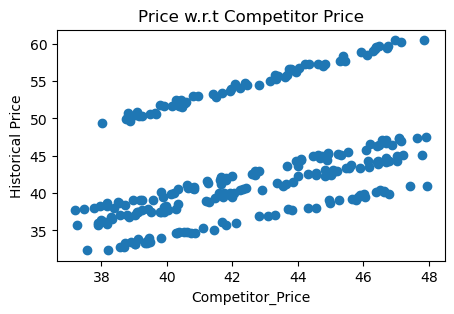

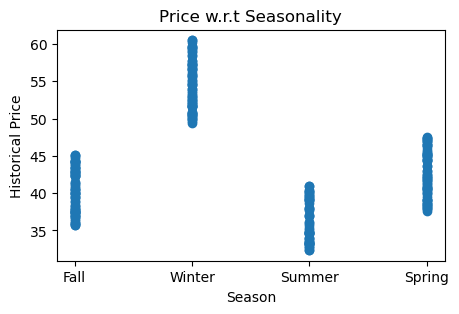

1074


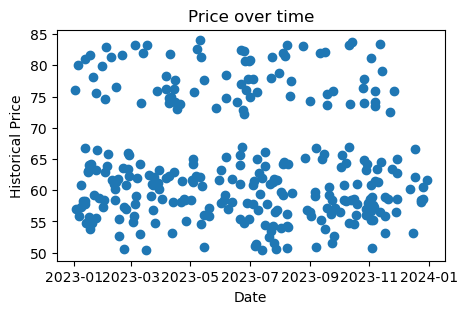

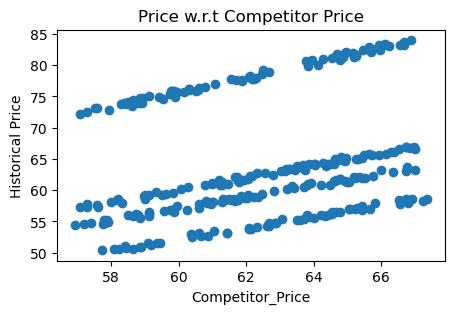

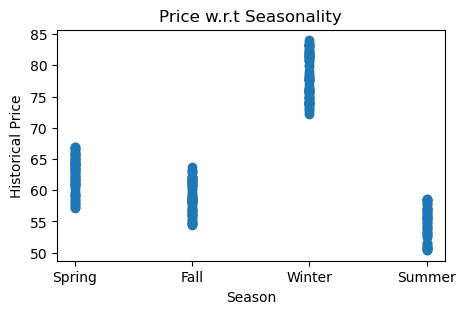

1075


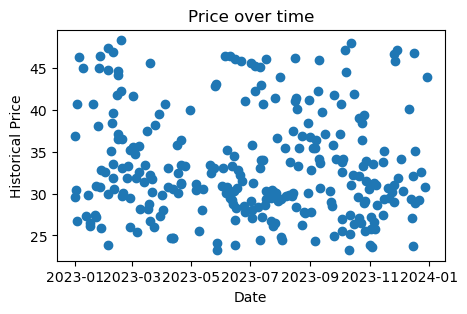

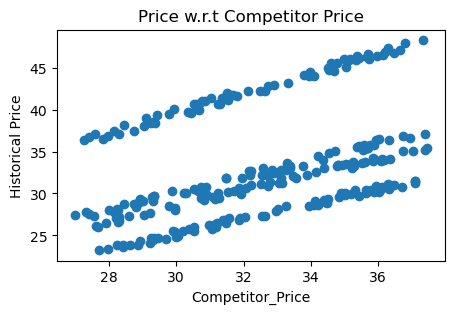

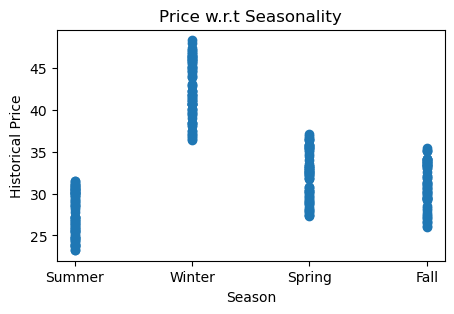

1076


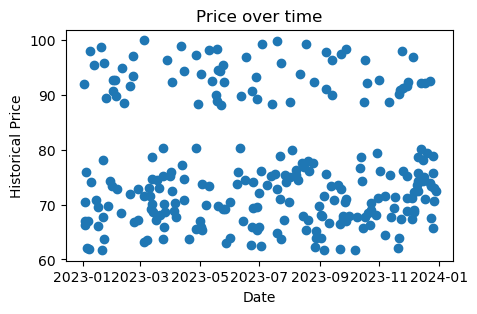

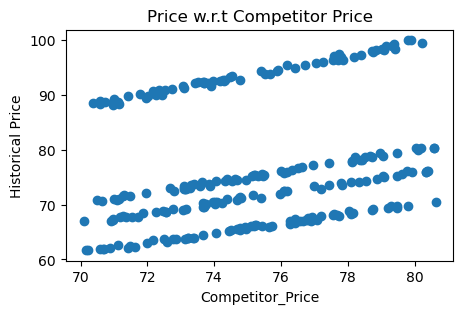

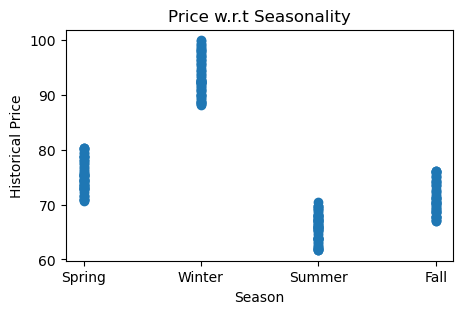

1077


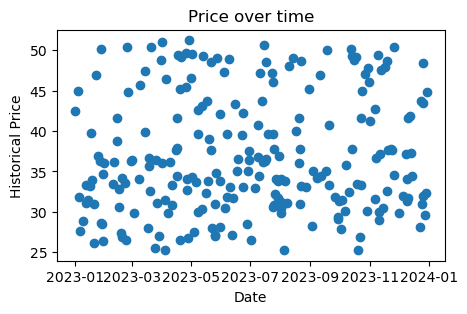

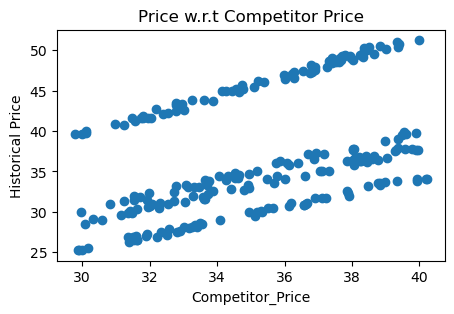

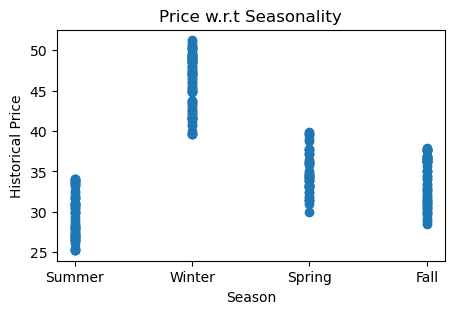

1078


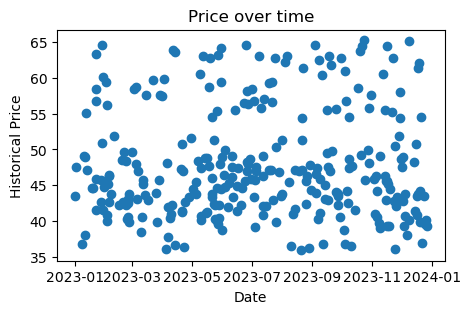

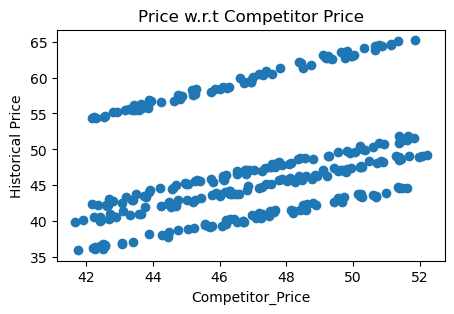

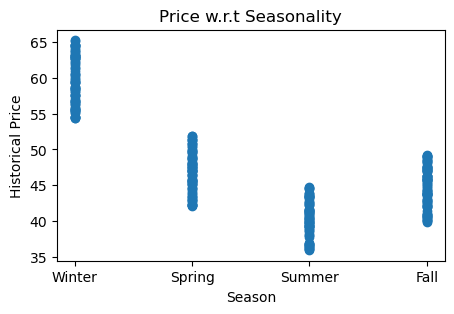

1079


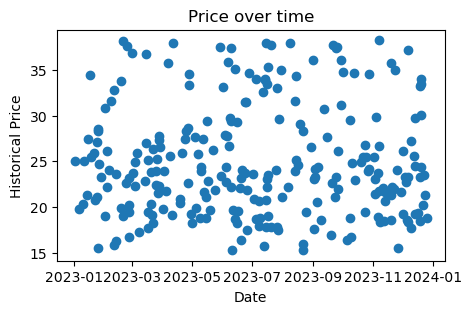

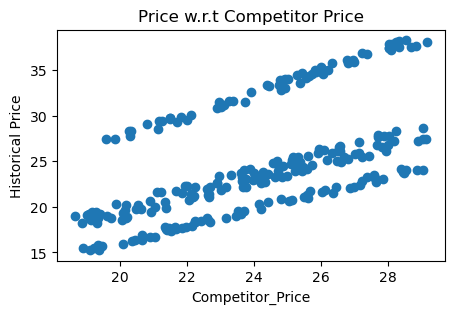

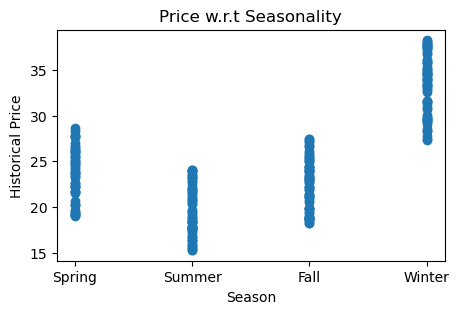

1080


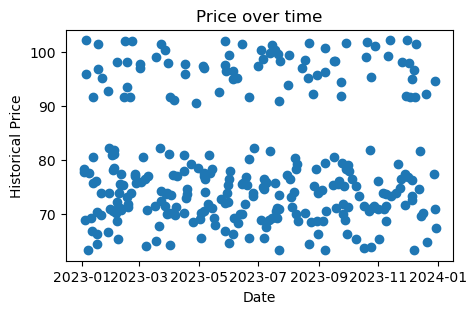

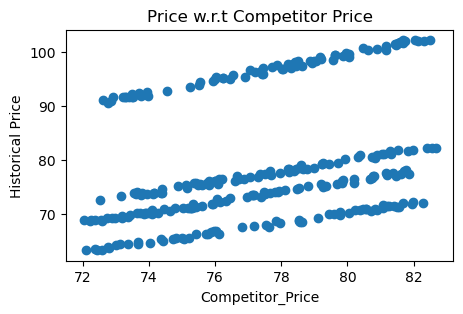

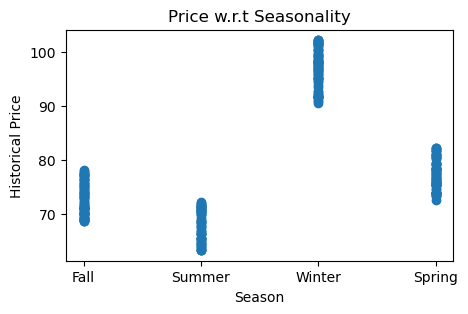

1081


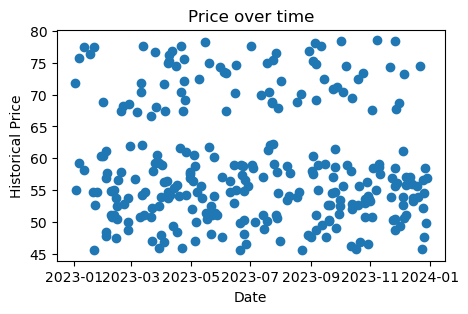

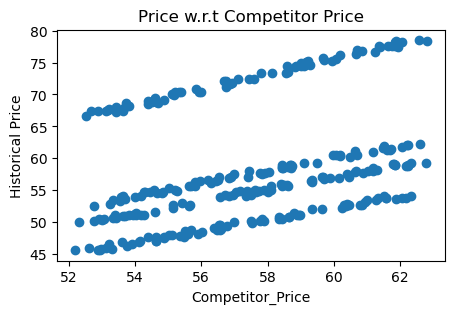

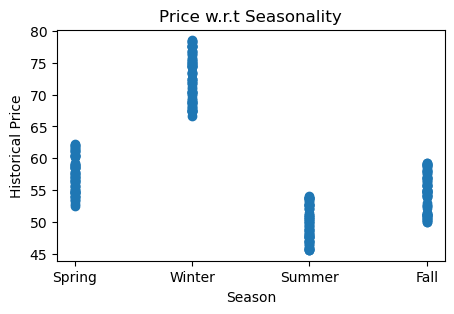

1082


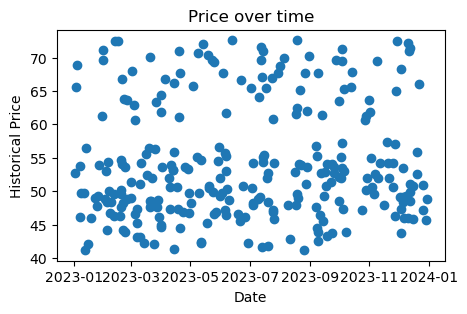

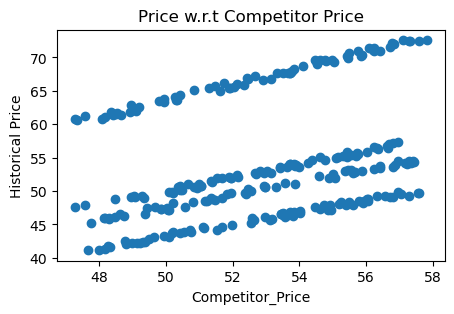

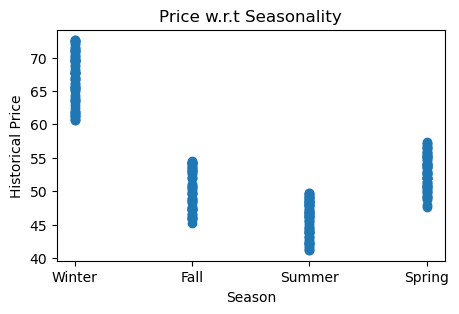

1083


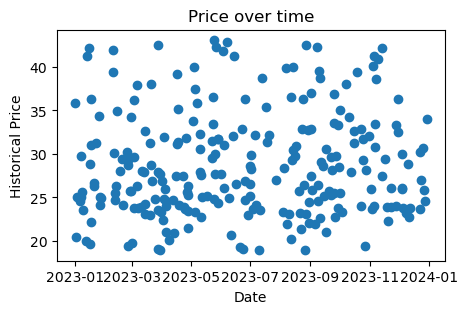

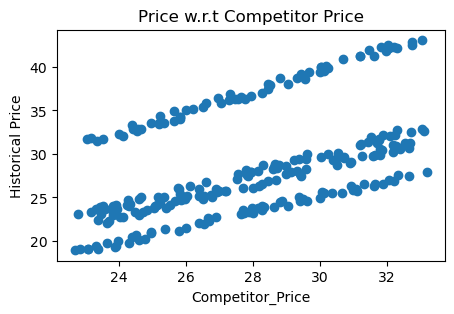

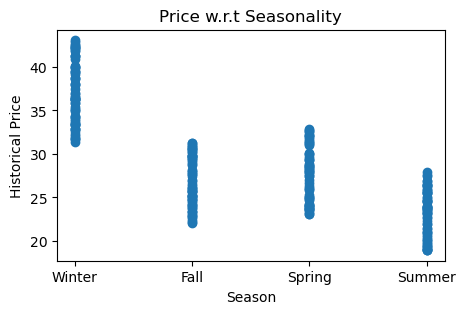

1084


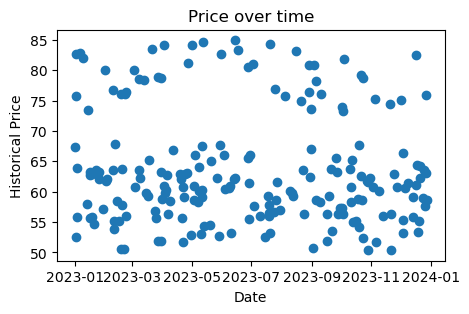

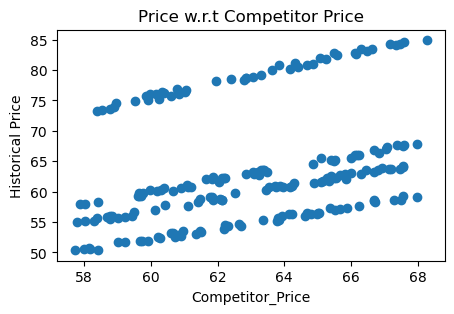

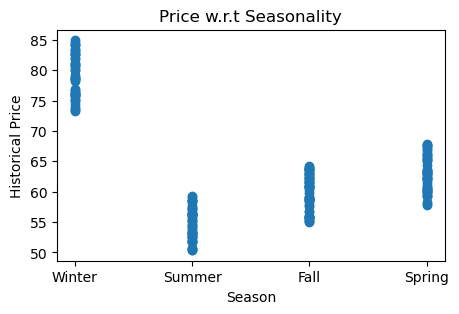

1085


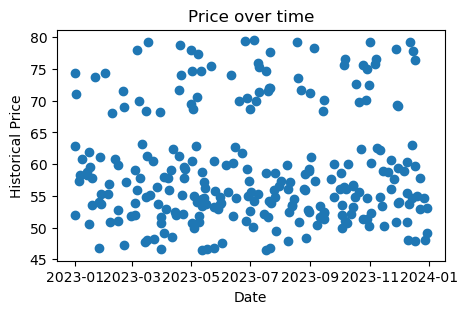

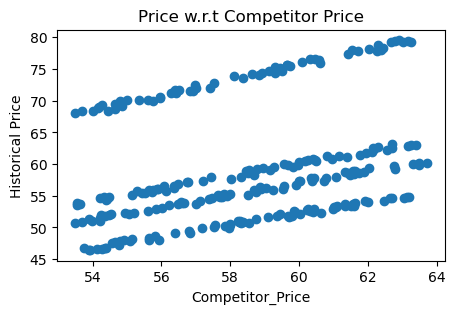

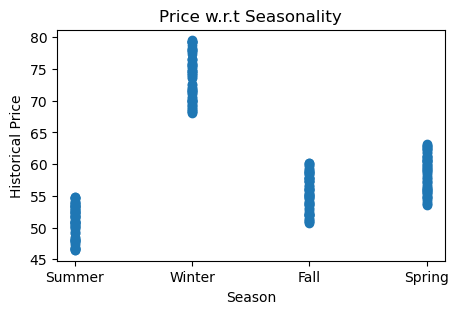

1086


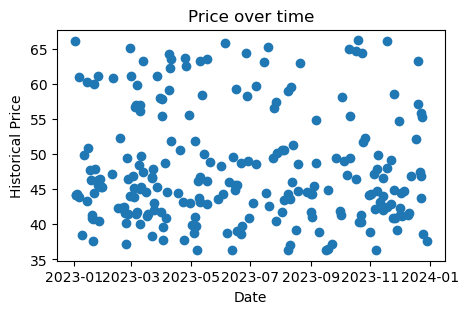

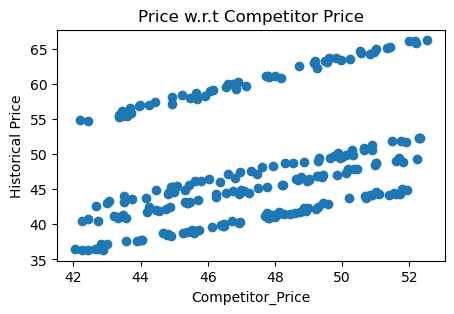

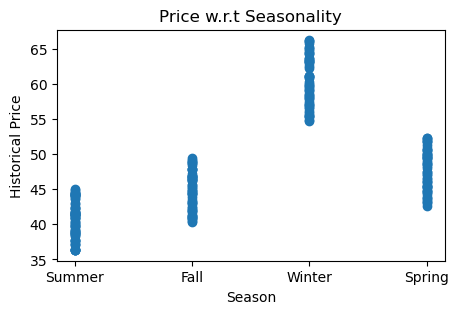

1087


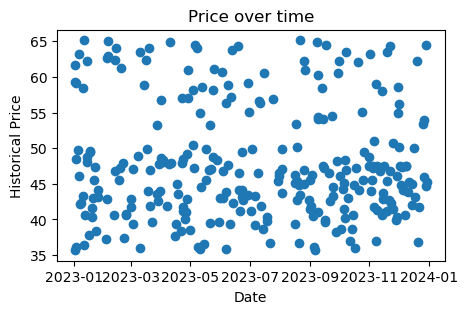

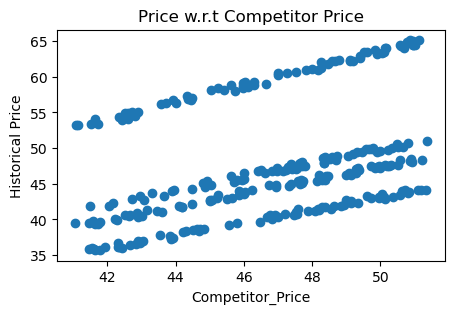

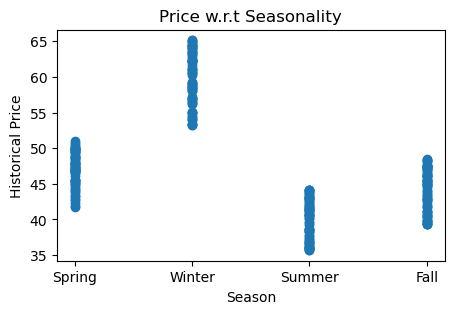

1088


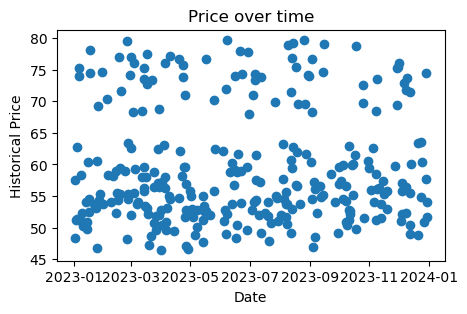

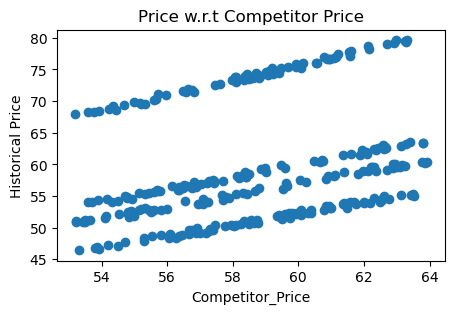

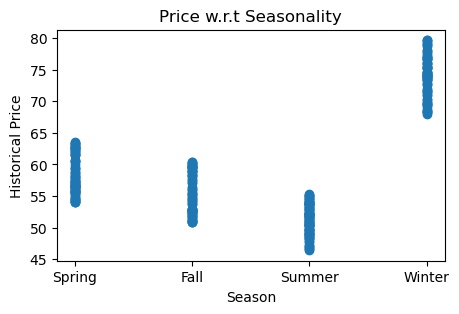

1089


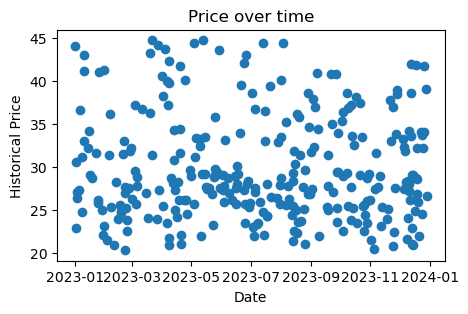

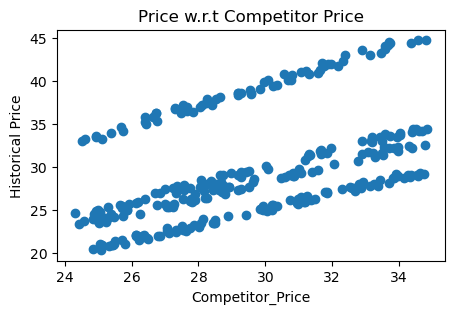

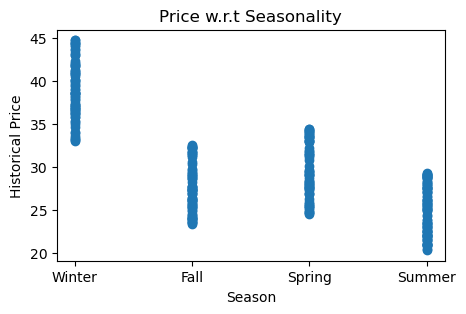

1090


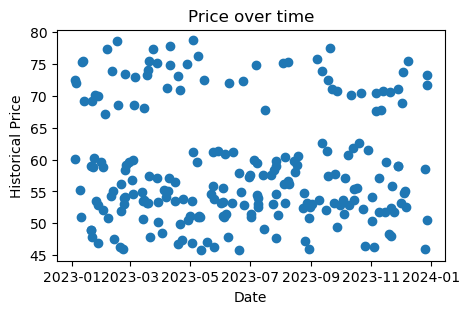

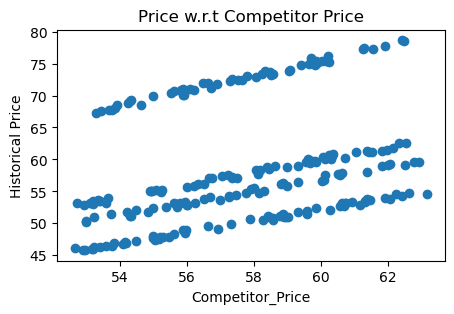

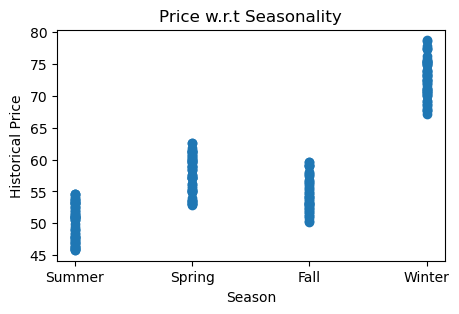

1091


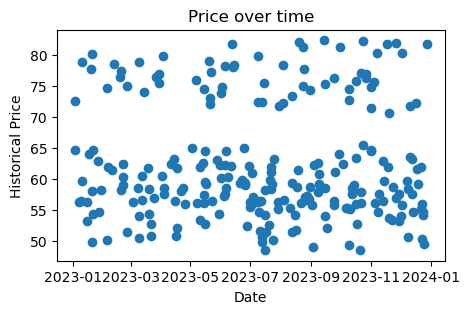

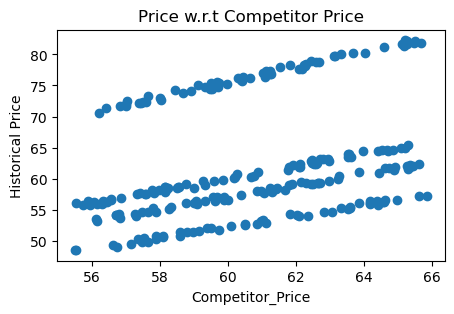

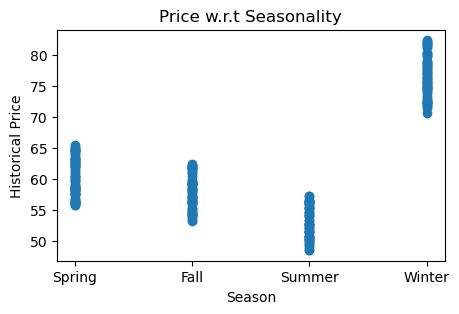

1092


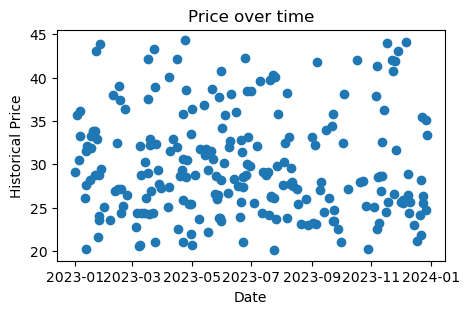

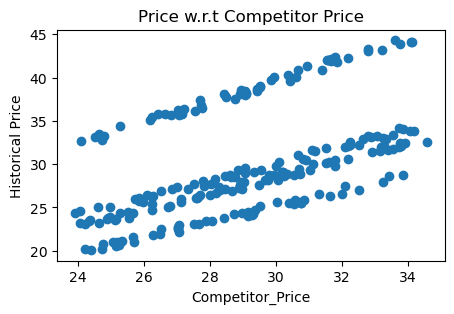

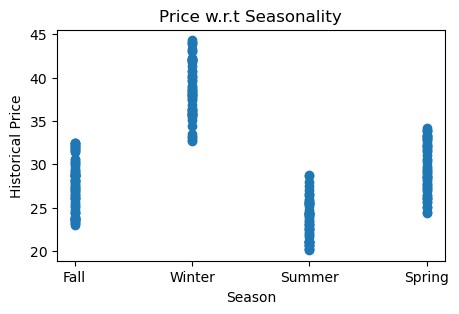

1093


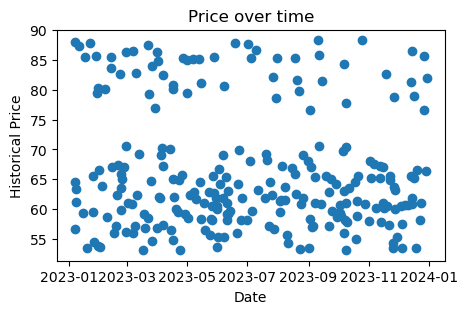

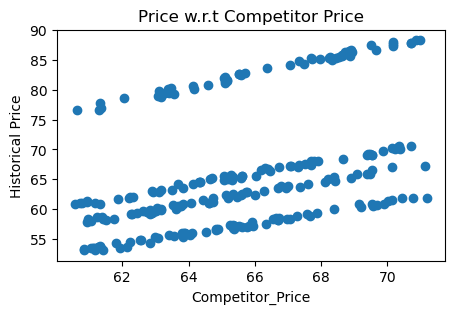

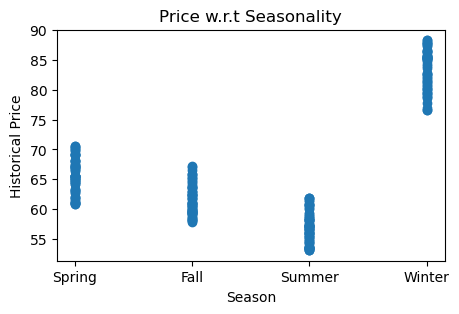

1094


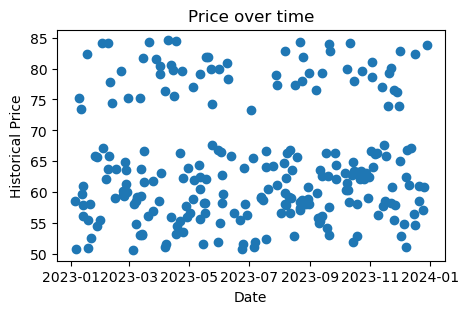

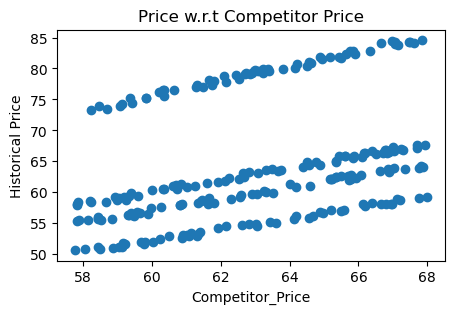

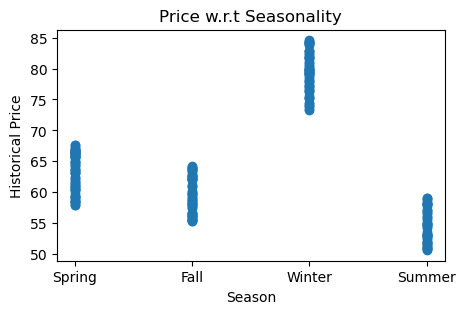

1095


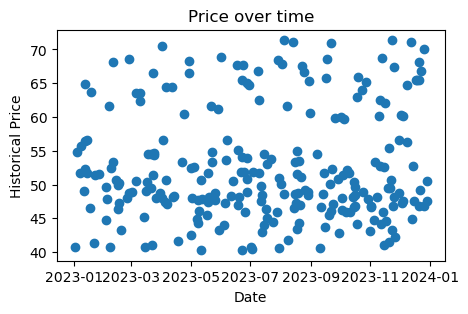

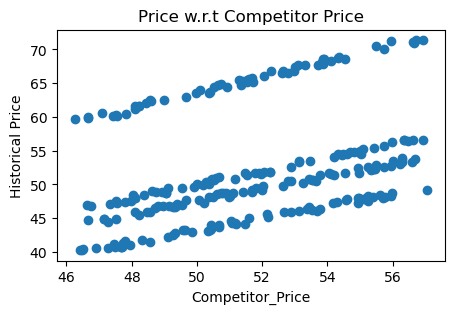

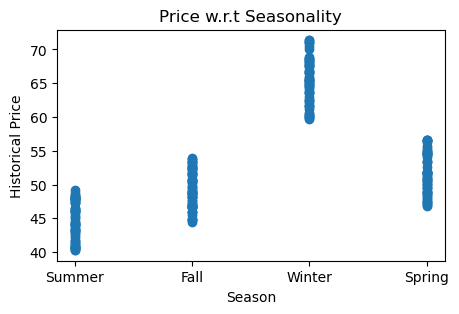

1096


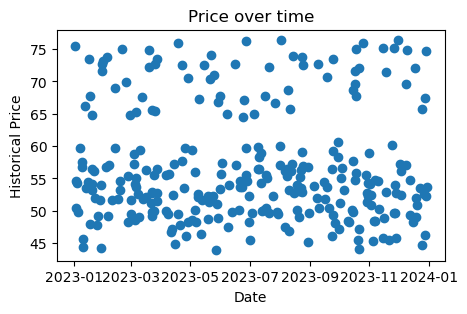

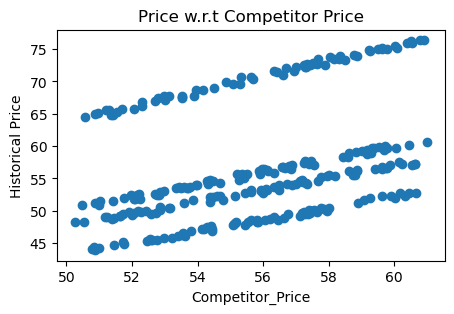

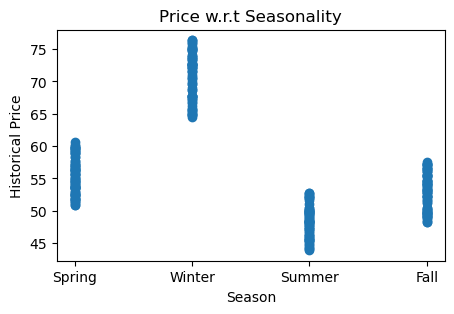

1097


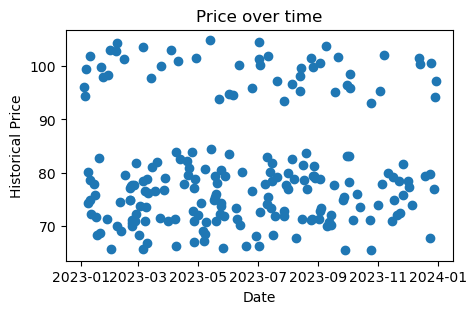

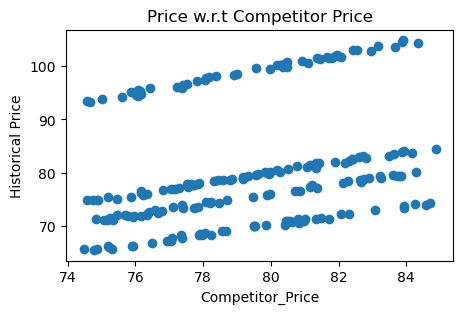

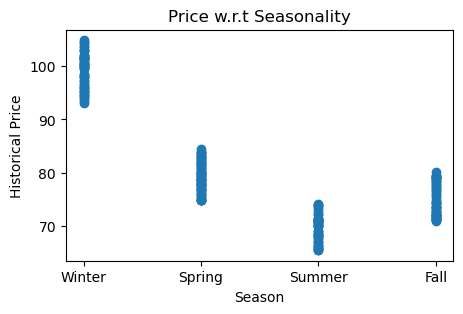

1098


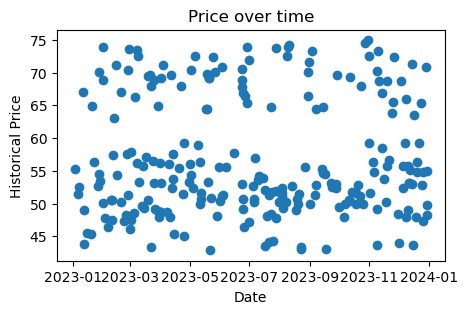

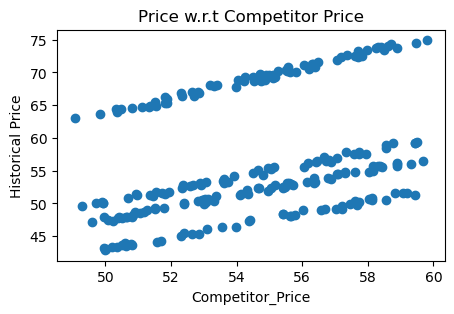

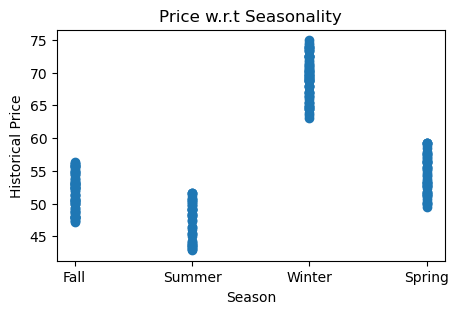

1099


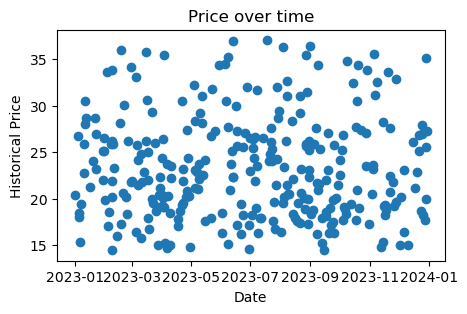

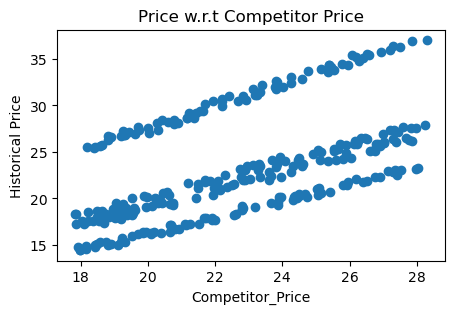

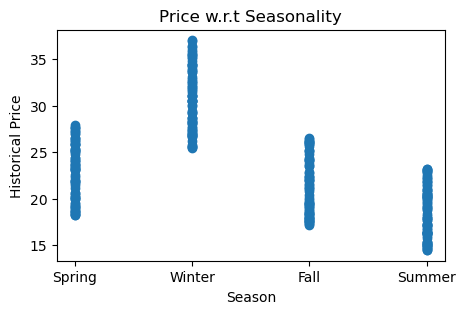

        Date  Product_ID  Historical_Price  Competitor_Price  Demand   
0 2023-09-11        1000             45.92             35.31     114  \
1 2023-10-02        1000             26.97             27.43      95   
2 2023-11-21        1000             26.45             31.78     188   
3 2023-08-21        1000             37.67             27.94     195   
4 2023-02-04        1000             26.67             32.01     104   

   Day_of_Week  Season Promotions Holiday  
0            2  Winter        Yes      No  
1            2  Spring         No     Yes  
2            1  Summer         No      No  
3            7  Winter        Yes     Yes  
4            5  Summer        Yes     Yes  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\prasi\OneDrive\Nileena\Liji Project\Major Project\dynamic_pricing_data.csv',low_memory=False)
df['Date'] = pd.to_datetime(df['Date'])

df_groped = df.groupby('Product_ID')

for name, group in df_groped:
    print(name)
    plt.figure(figsize=(5,3))
    plt.scatter(group['Date'], group['Historical_Price'])
    plt.title("Price over time")
    plt.xlabel('Date')
    plt.ylabel('Historical Price')
    plt.show()
    plt.figure(figsize=(5,3))
    plt.title("Price w.r.t Competitor Price")
    plt.scatter(group['Competitor_Price'], group['Historical_Price'])
    plt.xlabel('Competitor_Price')
    plt.ylabel('Historical Price')
    plt.show()
    plt.figure(figsize=(5,3))
    plt.title("Price w.r.t Seasonality")
    plt.scatter(group['Season'], group['Historical_Price'])
    plt.xlabel('Season')
    plt.ylabel('Historical Price')
    plt.show()
    

print(df.head())

#### Fit the model and predict

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.dayofyear

# Convert categorical features to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Season', 'Promotions', 'Holiday'], drop_first=True)

# Split the data into training and testing sets
X = df.drop(columns=['Historical_Price'])
y = df['Historical_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(X_train.head())

        Date  Product_ID  Historical_Price  Competitor_Price  Demand   
0 2023-09-11        1000             45.92             35.31     114  \
1 2023-10-02        1000             26.97             27.43      95   
2 2023-11-21        1000             26.45             31.78     188   
3 2023-08-21        1000             37.67             27.94     195   
4 2023-02-04        1000             26.67             32.01     104   

   Day_of_Week  Season Promotions Holiday  
0            2  Winter        Yes      No  
1            2  Spring         No     Yes  
2            1  Summer         No      No  
3            7  Winter        Yes     Yes  
4            5  Summer        Yes     Yes  
       Date  Product_ID  Competitor_Price  Demand  Day_of_Week  Season_Spring   
8742     58        1035             32.66     122            6          False  \
15547    61        1061             73.76     195            1          False   
12066    50        1048             24.54     188           

#### Model Accuracy

In [13]:

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Add predicted values to the DataFrame
df_test = df.loc[X_test.index].copy()
df_test['Predicted_Price'] = y_pred
X_train['Predicted_Price'] = 0

final_df = pd.concat([X_train, df_test])

final_df

Mean Squared Error (MSE): 0.10440057910609073
R^2 Score: 0.999698254961977


Date  Product_ID  Competitor_Price  Demand  Day_of_Week  Season_Spring   
8742     58        1035             32.66     122            6          False  \
15547    61        1061             73.76     195            1          False   
12066    50        1048             24.54     188            1           True   
2189     32        1008             64.05     124            5          False   
17455    56        1068             32.01     194            7           True   
...     ...         ...               ...     ...          ...            ...   
7088    165        1028             40.00     177            2          False   
13856   204        1054             54.79     101            3          False   
410     140        1001             38.24     154            2           True   
21596    15        1084             58.54     189            6          False   
3899     45        1015             69.36     168            6          False   

       Season_Summer  Season_Winter  Promotions_Yes  Holiday_Yes   
8742            True          False            True         True  \
15547           True          False           False         True   
12066          False          False           False        False   
2189            True          False            True        False   
17455          False          False            True         True   
...              ...            ...             ...          ...   
7088           False           True           False         True   
13856          False          False            True         True   
410            False          False           False         True   
21596          False           True            True         True   
3899           False          False            True         True   

       Predicted_Price  Historical_Price  
8742            0.0000               NaN  
15547           0.0000               NaN  
12066           0.0000               NaN  
2189            0.0000               NaN  
17455           0.0000               NaN  
...                ...               ...  
7088           51.5585             51.58  
13856          51.8868             52.12  
410            38.4136             38.39  
21596          73.7554             73.46  
3899           65.9064             66.27  

[25448 rows x 12 columns]

#### Feature reconstruction

In [28]:
def feature_recon(df):
    
    df_recon = df.copy()

    # Reconstruct original categorical columns
    for col in ['Season', 'Promotions', 'Holiday']:
        dummy_cols = [c for c in df.columns if c.startswith(f"{col}_")]
        #print(dummy_cols)
        if dummy_cols:
            df_recon[col] = df[dummy_cols].idxmax(axis=1).str.split('_').str[1]
        else:
            df_recon[col] = df[col]


    df_recon = df_recon.drop(columns= ['Season_Spring', 'Season_Summer', 'Season_Winter', 
                                                                   'Promotions_Yes',
                                                                  'Holiday_Yes'] )

    return df_recon

#### Fetch sample data set for prominent features of prediction

In [29]:

# Function to extract distinct subsets for important features
def get_feature_subset(df, feature, top_n=5):
    feature_importance = importance_df[importance_df['Feature'] == feature]['Importance'].values[0]
    
    if 'Competitor_Price' in feature:
       
        subset = df[(df['Competitor_Price'] > df['Competitor_Price'].mean() + df['Competitor_Price'].std() * feature_importance) |
                    (df['Competitor_Price'] < df['Competitor_Price'].mean() - df['Competitor_Price'].std() * feature_importance)]
    elif 'Season' in feature:
        
        subset = df[df[feature] == 1]
        
    elif 'Day_of_Week' in feature:
        
        subset = df[df[feature] == 1]
    else:
        subset = df.nlargest(top_n, feature)
    
    return subset.sample(n=top_n, random_state=42)

final_df = final_df.dropna(subset=['Historical_Price'])
# Calculate feature importances
feature_importances = model.feature_importances_
#print(feature_importances)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

    
# Extract subsets for top 3 important features
top_important_features = importance_df['Feature'].head(6).tolist()

subsets = {feature: get_feature_subset(final_df, feature) for feature in top_important_features}


# Display subset sizes and a few rows for each
df_test_recon = feature_recon(df_test)

for feature, subset in subsets.items():
    print(f"\nSubset for feature: {feature}")
    #print(subset)
    subset = subset.reset_index(drop=True)
   
    #print(subset['Product_ID'].iloc[0])
    #Print all records including train and test
    #print(final_df_reconstructed.loc[final_df_reconstructed['Product_ID']==subset['Product_ID'].iloc[0]]. head())
    # Print only test records
    print(df_test_recon.loc[df_test_recon['Product_ID']==subset['Product_ID'].iloc[0]].head().to_string(index= False))
    


Feature Importances:
            Feature  Importance
2  Competitor_Price    0.824704
7     Season_Winter    0.157954
6     Season_Summer    0.014846
5     Season_Spring    0.002323
0              Date    0.000048
3            Demand    0.000047
1        Product_ID    0.000037
4       Day_of_Week    0.000025
8    Promotions_Yes    0.000008
9       Holiday_Yes    0.000007

Subset for feature: Competitor_Price
 Date  Product_ID  Historical_Price  Competitor_Price  Demand  Day_of_Week  Predicted_Price Season Promotions Holiday
  145        1027             38.65             38.60     163            2          38.5736 Spring        Yes     Yes
   24        1027             38.84             40.47      52            2          38.6852 Spring        Yes     Yes
  259        1027             37.33             37.70     107            3          37.5281 Spring        Yes     Yes
  248        1027             51.95             39.88      86            3          51.5324 Winter        Yes     Yes

In [17]:
df_test_recon

Date  Product_ID  Historical_Price  Competitor_Price  Demand   
14644   223        1057             63.16             66.38     125  \
2858    237        1011             69.40             79.15     130   
21411    44        1083             26.35             28.17     165   
10157   312        1040             20.17             24.49      75   
17861   160        1070             64.60             64.66      86   
...     ...         ...               ...               ...     ...   
7088    165        1028             51.58             40.00     177   
13856   204        1054             52.12             54.79     101   
410     140        1001             38.39             38.24     154   
21596    15        1084             73.46             58.54     189   
3899     45        1015             66.27             69.36     168   

       Day_of_Week  Predicted_Price  Season Promotions Holiday  
14644            2          62.9460  Spring        Yes     Yes  
2858             2          69.3217  Summer        Yes     Yes  
21411            5          26.9276  Spring        Yes     Yes  
10157            1          20.2609  Summer        Yes     Yes  
17861            1          64.8780  Spring        Yes     Yes  
...            ...              ...     ...        ...     ...  
7088             2          51.5585  Winter        Yes     Yes  
13856            3          51.8868  Spring        Yes     Yes  
410              2          38.4136  Spring        Yes     Yes  
21596            6          73.7554  Winter        Yes     Yes  
3899             6          65.9064  Spring        Yes     Yes  

[5090 rows x 10 columns]